<a href="https://colab.research.google.com/github/IQ1998/BusinessCardReader/blob/master/OCRPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OCR helper function

In [0]:
##### OCR helper function ###########################################################
def cv2_imshow_label(image, image_title):
  print("-"*15 + image_title + "-"*15)
  cv2_imshow(image)
  print("-"*len("-"*15 + image_title + "-"*15))
  
def merge_rect_horizontally(rects, image_width = 0):
  # Bool array indicating which initial bounding rect has
  # already been used
  rectsUsed = []
  for i in range(len(rects)):
    rectsUsed.append(False)
  sorted_X_rects = sorted(rects, key = lambda rect : rect[0])
  
  acceptedRects = []
  for outerIndex, outerRect in enumerate(sorted_X_rects):
    if (rectsUsed[outerIndex] == False):
      #Initialze current rect:
      currX = outerRect[0]
      currY = outerRect[1]
      currX_bot_right = outerRect[0] + outerRect[2]
      currY_bot_right = outerRect[1] + outerRect[3] 
      currW = outerRect[2]
      currH = outerRect[3]
      # This rect is used:
      rectsUsed[outerIndex] = True
      # Iterate all initial bounding rects
      # starting from the next
      for subIndex, subRect in enumerate(sorted_X_rects):
          if rectsUsed[subIndex] == False :
            # Initialize current merge candidate:
            candX = subRect[0]
            candY = subRect[1]
            candX_bot_right = subRect[0] + subRect[2]
            candY_bot_right = subRect[1] + subRect[3]
            candW = subRect[2]
            candH = subRect[3]

            # Check if the bounding rectangle of the current rect and the candidate rect
            # width >= the sum of width of the 2 other rects AND if the sum area of 
            # the 2 rectangle / the area of the bounding rect > 0.8

            # Get the bounding rectangle
            boundX = min(currX, candX)
            boundY = min(currY, candY)
            boundX_bot_right = max(candX_bot_right, currX_bot_right)
            boundY_bot_right = max(currY_bot_right, candY_bot_right)
            boundW = boundX_bot_right - boundX
            boundH = boundY_bot_right - boundY
            ratio = (candW*candH + currW*currH) / (boundW*boundH)
            height_ratio = currH/candH
#              
            if (height_ratio >= 0.65 and height_ratio <= 1.5 and ((currW + candW)*0.9 <= boundW) and (ratio > 0.875)) or (b_inside_a([currX, currY, currW, currH], [candX, candY, candW, candH], 15) and ratio > 0.75):
              currX = boundX
              currY = boundY
              currX_bot_right = boundX_bot_right
              currY_bot_right = boundY_bot_right
              currW = boundW
              currH = boundH
              rectsUsed[subIndex] = True
#             elif is_close_toghether([currX, currY, currW, currH], [candX, candY, candW, candH], image_width) and ratio > 0.8:
#               currX = boundX
#               currY = boundY
#               currX_bot_right = boundX_bot_right
#               currY_bot_right = boundY_bot_right
#               currW = boundW
#               currH = boundH
#               rectsUsed[subIndex] = True
      acceptedRects.append([currX, currY, currW, currH])  
  return acceptedRects

def merge_rect_inside(rects):
    # Bool array indicating which initial bounding rect has
  # already been used
  rectsUsed = []
  for i in range(len(rects)):
    rectsUsed.append(False)
  sorted_X_rects = sorted(rects, key = lambda rect : rect[0])
  
  acceptedRects = []
  for outerIndex, outerRect in enumerate(sorted_X_rects):
    if (rectsUsed[outerIndex] == False):
      #Initialze current rect:
      currX = outerRect[0]
      currY = outerRect[1]
      currX_bot_right = outerRect[0] + outerRect[2]
      currY_bot_right = outerRect[1] + outerRect[3] 
      currW = outerRect[2]
      currH = outerRect[3]
      # This rect is used:
      rectsUsed[outerIndex] = True
      # Iterate all initial bounding rects
      # starting from the next
      for subIndex, subRect in enumerate(sorted_X_rects):
          if rectsUsed[subIndex] == False :
            # Initialize current merge candidate:
            candX = subRect[0]
            candY = subRect[1]
            candX_bot_right = subRect[0] + subRect[2]
            candY_bot_right = subRect[1] + subRect[3]
            candW = subRect[2]
            candH = subRect[3]

            # Check if the bounding rectangle of the current rect and the candidate rect
            # width >= the sum of width of the 2 other rects AND if the sum area of 
            # the 2 rectangle / the area of the bounding rect > 0.8

            # Get the bounding rectangle
            boundX = min(currX, candX)
            boundY = min(currY, candY)
            boundX_bot_right = max(candX_bot_right, currX_bot_right)
            boundY_bot_right = max(currY_bot_right, candY_bot_right)
            boundW = boundX_bot_right - boundX
            boundH = boundY_bot_right - boundY
            ratio = (candW*candH + currW*currH) / (boundW*boundH)
            if (b_inside_a([currX, currY, currW, currH], [candX, candY, candW, candH], 1) and ratio > 0.9):
              currX = boundX
              currY = boundY
              currX_bot_right = boundX_bot_right
              currY_bot_right = boundY_bot_right
              currW = boundW
              currH = boundH
              rectsUsed[subIndex] = True
    #         else:

      acceptedRects.append([currX, currY, currW, currH])  
  return acceptedRects
  

def check_horizontal_proj(region, w, h):
  horizontal_proj = np.sum(region, 1)
  horizontal_proj = horizontal_proj / 255
  third_element = len(horizontal_proj) // 3
  
  temp = np.partition(-horizontal_proj, third_element)
  top_third_proj = -temp[:third_element]
  
  if w >= h:
    
    ratio = np.sum(top_third_proj) / (w*len(top_third_proj))
  else:
    ratio = np.sum(top_third_proj) / (h*len(top_third_proj))
  return ratio > 0.8
  
  
  
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=2.69, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened
 
###########################################################


  
  
def merge_rect_vertically(rects):
  # Bool array indicating which initial bounding rect has
  # already been used
  rectsUsed = []
  for i in range(len(rects)):
    rectsUsed.append(False)
  sorted_Y_rects = sorted(rects, key = lambda rect : rect[1])
  
  acceptedRects = []
  for outerIndex, outerRect in enumerate(sorted_Y_rects):
    if (rectsUsed[outerIndex] == False):
      #Initialze current rect:
      currX = outerRect[0]
      currY = outerRect[1]
      currX_bot_right = outerRect[0] + outerRect[2]
      currY_bot_right = outerRect[1] + outerRect[3] 
      currW = outerRect[2]
      currH = outerRect[3]
      # This rect is used:
      rectsUsed[outerIndex] = True
      # Iterate all initial bounding rects
      # starting from the next
      for subIndex, subRect in enumerate(sorted_Y_rects[(outerIndex + 1) :], start = outerIndex + 1):
          if rectsUsed[subIndex] == False :
            # Initialize current merge candidate:
            candX = subRect[0]
            candY = subRect[1]
            candX_bot_right = subRect[0] + subRect[2]
            candY_bot_right = subRect[1] + subRect[3]
            candW = subRect[2]
            candH = subRect[3]

            # Check if the bounding rectangle of the current rect and the candidate rect
            # height >= the sum of height of the 2 other rects AND if the sum area of 
            # the 2 rectangle / the area of the bounding rect > 0.8

            # Get the bounding rectangle
            boundX = min(currX, candX)
            boundY = currY
            boundX_bot_right = max(currX_bot_right, candX_bot_right)
            boundY_bot_right = candY_bot_right
            boundW = boundX_bot_right - boundX
            boundH = boundY_bot_right - boundY
            ratio = (candW*candH + currW*currH) / (boundW*boundH)
            if ((currH + candH)*0.9 <= boundH) and (ratio > 0.9) and boundW/(max(currW, candW)) > 0.998:
              currX = boundX
              currY = boundY
              currX_bot_right = boundX_bot_right
              currY_bot_right = boundY_bot_right
              currW = boundW
              currH = boundH
              rectsUsed[subIndex] = True
    #         else:

      acceptedRects.append([currX, currY, currW, currH])
  return acceptedRects


def order_points(points):
  # Order: top left, top right, bot right and bot left
  rect = np.zeros((4, 2), dtype = "float32")
  # Top left is tthe one with the smallest x+y sum, bot right with largest
  s = points.sum(axis = 1)
  rect[0] = points[np.argmin(s)]
  rect[2] = points[np.argmax(s)]
  
  # Top right have bigger X and smaller y so |x-y| will larger
  d = np.diff(points, axis = 1)
  rect[1] = points[np.argmin(d)]
  rect[3] = points[np.argmax(d)]
  
  return rect

def perspective_4point_trans(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray, (5,5), 0)
  edged = cv2.Canny(gray, 75, 200)
  _, contours, _ = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
  screenContour = None
  for contour in contours:
    perimeter = cv2.arcLength(contour, False)
    approximate_contour = cv2.approxPolyDP(contour, 0.02*perimeter, True)
    
    if len(approximate_contour) == 4:
      screenContour = approximate_contour
      break

  
  rect = order_points(screenContour.reshape(4,2))
  (tl, tr, br, bl) = rect

  # compute the width of the new image, which will be the
  # maximum distance between bottom-right and bottom-left
  # x-coordiates or the top-right and top-left x-coordinates
  widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
  widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
  maxWidth = max(int(widthA), int(widthB))

  # compute the height of the new image, which will be the
  # maximum distance between the top-right and bottom-right
  # y-coordinates or the top-left and bottom-left y-coordinates
  heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
  heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
  maxHeight = max(int(heightA), int(heightB))

  # now that we have the dimensions of the new image, construct
  # the set of destination points to obtain a "birds eye view",
  # (i.e. top-down view) of the image, again specifying points
  # in the top-left, top-right, bottom-right, and bottom-left
  # order
  dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
    [0, maxHeight - 1]], dtype = "float32")

  # compute the perspective transform matrix and then apply it
  M = cv2.getPerspectiveTransform(rect, dst)
  warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

  # return the warped image
  return warped


def contain_bullS(text):
  unwantedCharRegex = re.compile(r'[_\-~\`!\*/=—<>;:$%“”]')
  numOfNum = len(unwantedCharRegex.findall(text))
  return numOfNum/len(text) 
  
def b_inside_a(a, b, tolerate):
  # a is a rectangle [x,y,w,h]
  # b is a second rect[x, y]
  # this is approximately inside NOT exactly inside
  x_a, y_a, w_a, h_a = a
  x_b, y_b, w_b, h_b = b
  first_point = x_b >= x_a and x_b <= x_a + w_a + tolerate and y_b >= y_a -5 and y_b <= y_a + h_a
  y_b_bl = y_b + h_b
  second_point = y_b_bl <= y_a +h_a + 5
  return first_point and second_point


def is_close_toghether(rect_A, rect_B, image_width):
  #Rect_A is assumed to be the left rectangle (smaller x)
  #Rect_B is the right rectangle (Bigger X)
  thresh = image_width / 20
  if rect_B[0] < rect_A[0]:
    temp = rect_A
    rect_A = rect_B
    rect_B = temp
  #First test: create a new rectang_B having the same y as rect_A if mergable then continue
  test_rect = rect_B
  test_rect[1] = rect_A[1]
  
  currX = rect_A[0]
  currY = rect_A[1]
  currX_bot_right = rect_A[0] + rect_A[2]
  currY_bot_right = rect_A[1] + rect_A[3] 
  currW = rect_A[2]
  currH = rect_A[3]

  candX = test_rect[0]
  candY = test_rect[1]
  candX_bot_right = test_rect[0] + test_rect[2]
  candY_bot_right = test_rect[1] + test_rect[3]
  candW = test_rect[2]
  candH = test_rect[3]

  # Get the bounding rectangle
  boundX = min(currX, candX)
  boundY = min(currY, candY)
  boundX_bot_right = max(candX_bot_right, currX_bot_right)
  boundY_bot_right = max(currY_bot_right, candY_bot_right)
  boundW = boundX_bot_right - boundX
  boundH = boundY_bot_right - boundY
  ratio = (candW*candH + currW*currH) / (boundW*boundH)

  if not ((((currW + candW)*0.9 <= boundW) and (ratio > 0.845)) or (b_inside_a([currX, currY, currW, currH], [candX, candY, candW, candH], 15) and ratio > 0.75)):
    return False
  
  #Calculate distance between 2 rect
  a_top_right = np.array([rect_A[0] + rect_A[2], rect_A[1]])
  a_bot_right = np.array([rect_A[0] + rect_A[2], rect_A[1] + rect_A[3]])
  b_top_left = np.array([rect_B[0], rect_B[1]])
  b_bot_left = np.array([rect_B[0], rect_B[1] + rect_B[3]])

  dist_top = np.linalg.norm(a_top_right - b_top_left)
  dist_bot = np.linalg.norm(a_bot_right - b_bot_left)
#   print(dist_top)
#   print(dist_bot)
  return dist_bot <= thresh and dist_top <= thresh
  

## Detect infohelper function

In [0]:
def is_contact_number(text):
  obvious = ["phone", "fax", "cell", "direct", "ph.", "ph:", "tel", "appt"]
  
  numRegex = re.compile(r'[0-9]')
  numOfNum = len(numRegex.findall(text))
  characRegex = re.compile(r'[a-zA-Z]')
  numOfCharac = len(characRegex.findall(text))
  if any(obvious_text in text.lower() for obvious_text in obvious) and numOfNum >= 7:
    return True
  if numOfNum/len(text) >= 0.4 and numOfCharac/len(text) <= 0.4 and len(text) >= 11:
    return True
  
  oops = True
  num_of_continous = 0
  satisfied = False
  ## If still False then check for continous  number
  for charac in text.replace(" ", ""):
    if not satisfied:
      if bool(re.search(r'[0-9]', charac)):
        if oops == True:
          oops = False
        num_of_continous += 1
        if num_of_continous >= 7:
          satisfied = True
          break
      else:
        if oops == False:
          oops = True
        else:
          oops = True
          num_of_continous = 0

  if satisfied:
    return True
  return False
  

def get_num_ratio(text):
  numRegex = re.compile(r'[0-9]')
  numOfNum = len(numRegex.findall(text))
  return numOfNum/len(text) 

def get_charac_ratio(text):
  characRegex = re.compile(r'[a-zA-Z]')
  numOfCharac = len(characRegex.findall(text))
  return numOfCharac/len(text)
       
def pdist(counter):
    "Make a probability distribution, given evidence from a Counter."
    N = sum(counter.values())
    return lambda x: counter[x]/N

def Pwords(words):
    "Probability of words, assuming each word is independent of others."
    return product(P(w) for COUNTSw in words)

def product(nums):
    "Multiply the numbers together.  (Like `sum`, but with multiplication.)"
    result = 1
    for x in nums:
        result *= x
    return result

def splits(text, start=0, L=20):
    "Return a list of all (first, rest) pairs; start <= len(first) <= L."
    return [(text[:i], text[i:]) 
            for i in range(start, min(len(text), L)+1)]

def segment(text):
    "Return a list of words that is the most probable segmentation of text."
    if not text: 
        return []
    else:
        candidates = ([first] + segment(rest) 
                      for (first, rest) in splits(text, 1))
        return max(candidates, key=Pwords)
      
# def get_phone_fax_mobile(text, container_dict):
#   text_len = len(text)
#   dict_returned = container_dict
#   # preprocessing text
#   # strip new line at the end and beginning of text
#   text = text.strip("\n")
#   text = re.sub("( ){2, }", " ", text)
#   text = text.lower()
#   text = text.replace(":", "")
#   # 1st situaltion: There are 2 lines: phone + fax or phone + mobile
#   # Phone is assume and ussaully above
  
  
  
#   if text_len > 30:
#     if "\n" in text:
#       temp_list = text.split("\n")
#       splitted = [element for element in temp_list if element != ""]
#       dict_returned['phone'] = splitted[0]
      
#       if len(splitted) == 3:
#         if ("fa" in splitted[1] or "f" in splitted[1] or "ax" in splitted[1]) and dict_returned["fax"]:
#           dict_returned['fax'] = splitted[1]
#           dict_returned['mobile'] = splitted[2]
#         elif "c" in splitted[1] or "ll" in splitted[1] or "m" in splitted[1] or "bi" in splitted[1] or "ile" in splitted[1]:
#           dict_returned['mobile'] = splitted[1]
#           dict_returned['fax'] = splitted[2]
#       else:
#         if "fa" in splitted[1] or "f" in splitted[1] or "ax" in splitted[1]:
#           dict_returned['fax'] = splitted[1]
#         elif "c" in splitted[1] or "ll" in splitted[1] or "m" in splitted[1] or "bi" in splitted[1] or "ile" in splitted[1]:
#           dict_returned['mobile'] = splitted[1]
#       # dELETE all a-z in result    
#       for key, val in dict_returned.items():
#         dict_returned[key] = re.sub("[a-z]", "", val)
#       return dict_returned

#     # 2nd situation:
#     # Tel: (84-4) 3795 1028 | Fax: (84-4) 3795 1028
#     # T: (84-4) 3795 1028 | F: (84-4) 3795 1028
#     # Tel: (84-4) 3795 1028 | Mobile: (84-4) 3795 1028
#     # T: (84-4) 3795 1028 | M: (84-4) 3795 1028
    
#     else:
#       first_num_index = 0   # index of the first number in the text
#       second_word_index = 0 # index of the fist character of the second word

#       for indx, charac in enumerate(text):
#         # We append everything until we meet the second charac, we stop
#         # and start append to fax_mobile
#         if bool(re.search(r'\d', charac)):
#           first_num_index = indx
#           break
#       for indx, charac in enumerate(text[first_num_index:], start = first_num_index):
#         if bool(re.search(r'[a-z]', charac)):
#           second_word_index = indx
#           break
#       dict_returned["phone"]= text[:second_word_index]
#       if text[second_word_index] == "m":
#         dict_returned["mobile"] = text[second_word_index:]
#       else:
#         dict_returned["fax"] = text[second_word_index:]
#       # dELETE all a-z in result    
#       for key, val in dict_returned.items():
#         dict_returned[key] = re.sub("[a-z]", "", val)
#       return dict_returned
  
#   elif text_len <= 24:
#     # One num mode:
#     # if there are no character indication that it is a phone number or a mobile or a fax
#     # Then the first one is the fucking phone number, 
#     # why because it is fucking impossible for a computer to distinguish between 2 phone number without any indication 
#     # How do we know if it is the first one, if the container_dict is blank then it is the first one
#     if not bool(re.search(r'[a-z]', text)):
#       if not dict_returned["phone"]:
#         dict_returned["phone"] = text
#       elif not dict_returned["fax"] and dict_returned["phone"]:
#         dict_returned["fax"] = text
#       elif not dict_returned["mobile"] and dict_returned["phone"] and dict_returned["fax"]:
#         dict_returned["mobile"] = text
#     else:
#       if ("t" in text or "el" in text or "te" in text or "ph" in text or "phone" in text or "p" in text or "h" in text) and not dict_returned["phone"]:
#         dict_returned["phone"] = text
#       elif ("fa" in text or "f" in text or "ax" in text) and not dict_returned['fax']:
#         dict_returned['fax'] = text
#       elif ("c" in text or "ll" in text or "m" in text or "bi" in text or "ile" in text) and not dict_returned["mobile"]:
#         dict_returned["mobile"] = text
#       else:
#         if not dict_returned["phone"]:
#           dict_returned["phone"] = text
#         elif not dict_returned["fax"]:
#           dict_returned
#     # dELETE all a-z in result    
#     for key, val in dict_returned.items():
#       dict_returned[key] = re.sub("[a-z]", "", val)
#     return dict_returned
      
  
def get_contact_num(text_list):
  text_list_processed = []
  text_list_final = []
  for text in text_list:
    text = text.strip("\n")
    # text = re.sub("( ){2, }", " ", text)
    text = text.lower()
    text = text.replace(":", "")
    text_list_processed.append(text)

  print(text_list_processed)
  for text in text_list_processed:
    # There are two cases: contact numbers get stick in between other tags
    # and not getting stick
    if len(re.compile(r"[a-zA-Z]").findall(text)) < 12:
      if len(text) >= 27:
        if "\n" in text:
          splitted = [element for element in text.split("\n") if element != ""]  
          text_list_final += splitted
        else:
          text_list_final += find_number_in_line(text)
      elif len(text) <= 26:
        text_list_final.append(text)
    else:
      print("Get stuck")
      oops = True
      num_of_continous = 0

      begin_journey = False
      begin_index = -1
      ## If still False then check for continous  number
      for indx, charac in enumerate(text):
        if charac == " ":
          continue
        if bool(re.search(r'[0-9]', charac)):
          if oops == True:
            oops = False
          if begin_journey == False:
            begin_journey = True
            begin_index = indx
          num_of_continous += 1
          if num_of_continous >= 7:
            break
        else:
          if oops == False:
            oops = True
          else:
            oops = False
            num_of_continous = 0
            begin_journey = False
            begin_index = -1
      

      # if begin_index != -1 then we get scan backward unti we get a " "
      scan_index = 0
      if begin_index != -1:
        # we use negative index 
        begin_index = begin_index - len(text)
        num_of_spaces = 0

        for i in range(begin_index, -len(text), -1):
          if text[i] == " ":
            num_of_spaces += 1
          if num_of_spaces == 2:
            scan_index = i
            break
        
        scan_index += len(text) # Convert back to positive index
        begin_index += len(text)

        append_text = ""
        for i in range(scan_index, len(text)-1, 1):
          if bool(re.search(r'[a-zA-Z]', text[i])) and i > begin_index:
            text_list_final.append(append_text)
            append_text = ""
            if len(re.compile(r'[0-9]').findall(text[i:])) >= 7:
              text_list_final.append(text[i:])
              break
          append_text += text[i]
          
        
      else:
        continue      
# stanford, ca 94305-8530
  print("text list final is: " + str(text_list_final))
  num_dict = {"phone": "", "fax":"", "cell": ""}
  
  if len(text_list_final) == 3:
    if not bool(re.search(r'[a-z]', text_list_final[0])) and not bool(re.search(r'[a-z]', text_list_final[1])):
      num_dict = find_fax_phone_blind(text_list_final)
    else:
      print("wegethere")
      for text in text_list_final:
        if "ce" in text or "ll" in text or "mo" in text or "bil" in text or "dir" in text or "ect" in text and num_dict["cell"] == "":
          num_dict["cell"] = text 
        elif not bool(re.search(r'[a-z]', text)) or "ph" in text or "ele" in text or "app" in text or "ppt" in text or "t" in text and num_dict["phone"] == "":
          num_dict["phone"] = text
        elif "f" in text or "a" in text or "x" in text and num_dict["fax"] == "":
          num_dict["fax"] = text
      
      print("num dict 1: ", num_dict)
      for key, val in num_dict.items():
        if val == "":
          num_dict = find_fax_phone_blind(text_list_final)
      print("num dict 2: ", num_dict)
          
  else:
    for text in text_list_final:
      print(text)
      if "ap" in text or "ppt" in text or "ph" in text or "t" in text or "ele" in text or not bool(re.search(r'[a-z]', text)) and num_dict["phone"] == "":
        num_dict["phone"] = text
      elif "ce" in text or "ll" in text or "mo" in text or "bil" in text or "dir" in text or "ect" in text and num_dict["cell"] == "":
        num_dict["cell"] = text 
      elif "f" in text or "a" in text or "x" in text and num_dict["fax"] == "":
        num_dict["fax"] = text
    # If we don't fill all the values then we keep guessing base on the similarities
    if len([value for value in num_dict.values() if value != ""]) < 2 and len(text_list_final) == 2:

      if num_dict["phone"] != "":
        for text in text_list_final:
          ratio = fuzz.ratio(num_dict["phone"], text)
          if ratio == 100:
            continue
          elif ratio >= 60:
            num_dict["fax"] = text
          else:
            num_dict["cell"] = text
      elif num_dict["fax"] != "":
        for text in text_list_final:
          ratio = fuzz.ratio(num_dict["fax"], text)
          if ratio == 100:
            continue
          elif ratio >= 60:
            num_dict["phone"] = text
          else:
            num_dict["cell"] = text
        
  return num_dict
 

        

def find_fax_phone_blind(text_list_final):
  num_dict = {"phone": "", "fax":"", "cell": ""}
  ratio_matrix = np.zeros(shape=(3, 3))
 
  for i in range(3):
    for j in range(3):
      ratio_matrix[i][j] = fuzz.ratio(text_list_final[i], text_list_final[j])
      if i == j:
        ratio_matrix[i][j] = 0
  max_coor = np.where(ratio_matrix == np.amax(ratio_matrix))
  listCoor = list(zip(max_coor[0], max_coor[1]))
  num_dict["phone"] = text_list_final[min(listCoor[0])]
  num_dict["fax"] = text_list_final[max(listCoor[0])]
  for i in range(3):
    if i not in listCoor[0]:
      num_dict["cell"] = text_list_final[i]
  
  return num_dict



        
        
def get_email(text):
  emailRegex = re.compile(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)')
  mo = emailRegex.findall(text)
  mo_returned = [mo_ele for mo_ele in mo if len(mo_ele) > 5]
  return mo_returned

# def is_job_title(text):
#   text = ' '.join([word[0].upper() + word[1:] for word in text.split()])
#   finder=FinderAcora()
#   job_list_tuple = finder.findall(text)[0][0]
#   return bool(finder.findall(text))
  
  
def get_website(text):
  websiteRegex = re.compile(r'(?:(?:https?:\/\/)?(?:[a-z0-9.\-]+|www|[a-z0-9.\-])[.](?:[^\s()<>]+|\((?:[^\s()<>]+|(?:\([^\s()<>]+\)))*\))+(?:\((?:[^\s()<>]+|(?:\([^\s()<>]+\)))*\)|[^\s!()\[\]{};:\'\".,<>?]))')
  mo = websiteRegex.findall(text)
  mo = [website for website in mo if bool(re.search(r'[a-z]', website))]
  mo2 = list(set(mo))
  return mo2

def is_street_add(text):
  if "@" in text:
    return False
  text_num_ratio = get_num_ratio(text)
  text_len = len(text)
#   and not is_contact_number(text)
  if ((text_num_ratio >= 0.05 and text_num_ratio <= 0.3) or ((text_len <= 14 and text_num_ratio > 0.3)) ) or (text_num_ratio >= 0.1 and "street" in text.lower()):
    return True
  ner_tagger = CoreNLPParser(url='http://localhost:9011', tagtype='ner')
  ne = list(ner_tagger.tag((text.split())))
  # only street address  if the text contain CITY STATE_OR_PROVINCE or ORGANIZATION
 
  necessary_tags = 0
  for _, tag in ne:
    if tag == "COUNTRY" or tag == "STATE_OR_PROVINCE" or tag == "CITY":
      necessary_tags += 1
    if necessary_tags == 1:
      break
      
  
  if necessary_tags == 2:
    
    # first condition is continous of 2 number
    oops_number = False
    num_of_num_continous = 0
    first_condition = False
    # Second condition is continous of 4 character
    oops_charac = False
    num_of_charac_continous = 0
    second_condition = False
    for charac in text.replace(" ", ""):
      if not first_condition:
        if bool(re.search(r'[0-9]', charac)):
          if oops_number == True:
            oops_number = False
          num_of_num_continous += 1
          if num_of_num_continous > 1:
            first_condition = True
        else:
          if oops_number == False:
            oops_number = True
          elif oops_number == True:
            oops_number = False
            num_of_num_continous = 0


      if not second_condition:
        if bool(re.search(r'[a-zA-Z]', charac)):
          if oops_charac == True:
            oops_charac == False
          num_of_charac_continous += 1
          if num_of_charac_continous > 3:
            second_condition = True
        else:
          if oops_charac == False:
            oops_charac = True
          elif oops_charac == True:
            oops_charac = False
            num_of_charac_continous = 0

    if first_condition and second_condition:
      return True

  return False


def can_be_merged(rect_A, rect_B):
  # See if two rect can be merged vertically
  if rect_A[1] > rect_B[1]:
    temp = rect_A
    rect_A = rect_B
    rect_B = temp
  currX = rect_A[0]
  currY = rect_A[1]
  currX_bot_right = rect_A[0] + rect_A[2]
  currY_bot_right = rect_A[1] + rect_A[3] 
  currW = rect_A[2]
  currH = rect_A[3]
  
  candX = rect_B[0]
  candY = rect_B[1]
  candX_bot_right = rect_B[0] + rect_B[2]
  candY_bot_right = rect_B[1] + rect_B[3]
  candW = rect_B[2]
  candH = rect_B[3]
  mergable = False
  boundX = min(currX, candX)
  boundY = currY
  boundX_bot_right = max(currX_bot_right, candX_bot_right)
  boundY_bot_right = candY_bot_right
  boundW = boundX_bot_right - boundX
  boundH = boundY_bot_right - boundY
  
  #and boundW/max(candW, currW) <= 1.12
  if (boundW/max(candW, currW) >= 1 and boundW/max(candW, currW) <= 1.12) and (boundH/(currH+candH) >= 1 and boundH/(currH+candH) <= 1.4):
    mergable = True
  return mergable



def guess_title(text, rect_size, first_time = True):
  if '\n' in text or text.lower() in ["email", "phone", "contact", "direct", "cell"]:
    return False
#   if "inc" in text.lower():
#     return True
  num_of_upper = len(re.compile(r"[A-Z]").findall(text))
  if num_of_upper >= 1 and rect_size[2] >= 180 and rect_size[3] >= 75:
    return True
  if len(text.split()) >= 3:
    num_NNP, num_NN = proper_noun_ratio(text)
    if num_NNP >= 0.6:
      return True
  
  global word_vectors
  global WORD_SET
  
  global model
  nonAlphabetic = re.compile(r"\W")
  text = " ".join([word for word in text.split() if not nonAlphabetic.match(word)])
  text = text.strip(" ")
  
  num_of_spaces = text.count(" ")
  
  text_len = len(text)
  print(text)
  try:
    if first_time:  
      if num_of_spaces == 0 and text not in WORD_SET and text_len > 3:
        return True
      elif num_of_spaces == 1 and num_of_upper >= 2:
        first_word, second_word = text.split()
        first_word = first_word.lower()
        second_word = second_word.lower()
        if model.similarity(first_word, second_word) <= 0.2: 
          return True

      elif num_of_spaces == 2 and num_of_upper >= 3:
        first_w, second_w, third_w = text.split()
        first_w = first_w.lower()
        second_w = second_w.lower()
        third_w = third_w.lower()
        if model.similarity(second_w, third_w) <= 0.3 and model.similarity(first_w, second_w) <= 0.2:
          return True

    else:
      if num_of_spaces == 0 and text_len > 3:
        return True
      elif num_of_spaces == 1 and num_of_upper >= 2: 
        return True
      elif num_of_spaces == 2 and num_of_upper >= 3:
        return True
  except KeyError:
    print("There are words that are not in dictionary")
    
def proper_noun_ratio(text):

  text = re.sub(r'[_\-~\`!\*/=—<>;:$%.]', "", text)
  num_NNP = 0
  num_NN = 0
  pos_tagger = CoreNLPParser(url='http://localhost:9011', tagtype='pos')
  text_tagged = list(pos_tagger.tag(text.split()))
  for word, tag in text_tagged:
    if tag == "NNP":
      num_NNP += 1
    elif tag == "NN":
      num_NN += 1
  return [num_NNP/len(text_tagged), num_NN/len(text_tagged)]


def find_number_in_line(text):
  first_num_index = 0   # index of the first number in the text
  meet2NonNumber = 0
  separation_indexes = []
  list_returned = []
  last_charac_index = 0
  for indx, charac in enumerate(text):
    if indx == 0:
      continue
    if bool(re.search(r'[a-z]', charac)) and not bool(re.search(r'[a-z]', text[indx-1])):
      last_charac_index = indx
#   print(last_charac_index)
  if get_num_ratio(text[last_charac_index:]) >= 0.35:
    # This mean Tel: (84-4) 3795 1028 | Fax: (84-4) 3795 1028 Cell (84-4) 3795 1028 
    for indx, charac in enumerate(text):
      # We start scanning at the first number, we consider that each
      # contact number will be separated by The first alphabet character
      # Or 2 spaces
      if bool(re.search(r'\d', charac)):
        first_num_index = indx
        break
#     print(first_num_index)
    for indx, charac in enumerate(text[first_num_index:], start = first_num_index):

      if (indx != (len(text) - 1)) and ((bool(re.search(r'[a-z]', charac)) and not bool(re.search(r'[a-z]', text[indx - 1]))) or (charac == " " and text[indx+1] == " ")):
        separation_indexes.append(indx)
#     print(separation_indexes)
    if len(separation_indexes) == 1:
      list_returned.append(text[:separation_indexes[0]])
      list_returned.append(text[separation_indexes[0]:])
    elif len(separation_indexes) == 2:
      list_returned.append(text[:separation_indexes[0]])
      list_returned.append(text[separation_indexes[0]:separation_indexes[1] + 1])
      list_returned.append(text[separation_indexes[1]:])

  else:
    # This mean 84-4) 3795 1028 Tel 84-4) 3795 1028 Cell 84-4) 3795 1028  Fax
 
    i = -1
    while i != -len(text):
      charac = text[i]
      if bool(re.search(r'\d', charac)):
        first_num_index = i
        break
      i -= 1
    i = first_num_index
#     print("fni: " + str(first_num_index))
    while i > -len(text):
      charac = text[i]
      if (bool(re.search(r'[a-z]', charac)) and not bool(re.search(r'[a-z]', text[i + 1]))) or (charac == " " and text[i- 1] == " "): 
        separation_indexes.append(i)
      i -= 1
#     print("si: ", separation_indexes)
    if len(separation_indexes) == 1:
      list_returned.append(text[-1:separation_indexes[0]:-1][: : -1])
      list_returned.append(text[separation_indexes[0]: -len(text) -1 : -1][: : -1])
    elif len(separation_indexes) == 2:
      list_returned.append(text[-1:separation_indexes[0]:-1][: : -1])
      list_returned.append(text[separation_indexes[0]:separation_indexes[1]:-1][: : -1])
      list_returned.append(text[separation_indexes[1]: -len(text) -1: -1][: : -1])
      
  if len(list_returned) == 0:
    return [text]
  return list_returned

def get_upper_case_ratio(text):
  upperRegex = re.compile(r'[A-Z]')
  numOfUpper = len(upperRegex.findall(text))
  return numOfUpper/len(text)


## Detect text in image function

In [0]:

def detect_text_2(image_path, DEBUG = False):
  
  text_returned = []
  image = cv2.imread(image_path)
  # May have to scale down (or up): good size is 1400 x 800 -> 700 x 400
  height = image.shape[0]
  width = image.shape[1]
  scaled = image.copy()
#   if height > 1800 and width > 2800:
#     # shrink the image
#     scaled = cv2.resize(image, None, fx=0.75, fy = 0.75, interpolation = cv2.INTER_AREA)
#     while (height > 900 and width > 1500):
#       scaled = cv2.resize(scaled, None, fx=0.75, fy = 0.75, interpolation = cv2.INTER_AREA)

#   if height < 350 and width < 650:
#     # enlarge the image 
#     scaled = cv2.resize(image, None, fx = 1.25, fy=1.25, interpolation = cv2.INTER_CUBIC)
#     while (height < 350 and width < 650):
#       scaled = cv2.resize(scaled, None, fx=1.25, fy=1.25, interpolation = cv2.INTER_LINEAR)
  # Convert to gray scale
  
  gray = cv2.cvtColor(scaled, cv2.COLOR_BGR2GRAY)
  if DEBUG:
    cv2_imshow_label(gray, "Gray Image")
  # Find the gradient of the image
  # Morphological gradient using elispe kernel
  kernel_elipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)) 
  morpho = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel_elipse)
  if DEBUG:
    cv2_imshow_label(morpho, "Morphological gradient elipse kernel")

  # Thresh hold
  _, thresh_otsu_morpho = cv2.threshold(morpho, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  if DEBUG:
    cv2_imshow_label(thresh_otsu_morpho, "Otsu Thresh + Morpho")
   
#   # Using flood fill to fill the inner are of the character
# #   black_pixels_coor = np.where(thresh_otsu_morpho == 0)

#   thresh_copy = thresh_otsu_morpho.copy()
#   mask = np.zeros((height+2, width +2), np.uint8)
#   cv2.floodFill(thresh_copy, mask, (int(width*(8/9)), int(height*(1/12))), 255)
#   flood_fill_inv = cv2.bitwise_not(thresh_copy)
#   out = thresh_otsu_morpho | flood_fill_inv
  
#   # Closing to remove noise
#   kernel_closing = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 3))
#   if cv2.countNonZero(out)/(height*width) < 0.3:
#   # kernel_closing_test = cv2.getStructuringElement(cv2.MORPH_RECT,(11,11))
#     closing = cv2.morphologyEx(out, cv2.MORPH_CLOSE, kernel_closing)
#     if DEBUG:
#       print(cv2.countNonZero(out)/(height*width))
#       cv2_imshow_label(closing, "Using flood fill")
#   else:
#     closing = cv2.morphologyEx(thresh_otsu_morpho, cv2.MORPH_CLOSE, kernel_closing)
#   if DEBUG:
#     cv2_imshow_label(closing, "Closing using 2x2 kernel to remove inner noise")
  
#   horizontal = closing.copy()
#   cols = horizontal.shape[1]
#   horizontal_size = int(cols // 1.5)
#   # Create structure element for extracting horizontal lines through morphology operations
#   horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
#   # Apply morphology operations
#   horizontal = cv2.erode(horizontal, horizontalStructure)
#   horizontal = cv2.dilate(horizontal, horizontalStructure)
#   closing = closing - horizontal
#   #Slight dilate after closing
# #   closing = cv2.dilate(horizontal, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)), iterations = 1)
  
#   if DEBUG:
#     cv2_imshow_label(closing, "Closing using 2x2 kernel, delete horizontal and then dilate to remove inner noise")

#   #Opening to remove outer noise
#   opening = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)))
#   if DEBUG:
#     cv2_imshow_label(opening, "Opening using 2x2 kernel to remove outer noise")
#   #We dilate
#   dilating = cv2.dilate(opening, cv2.getStructuringElement(cv2.MORPH_RECT, (5,1)), iterations = 2)
#   if DEBUG:
#     cv2_imshow_label(dilating, "Final dilate ?")
  dilating = cv2.dilate(thresh_otsu_morpho, cv2.getStructuringElement(cv2.MORPH_RECT, (4,2)), iterations = 2)
  if DEBUG:
    cv2_imshow_label(dilating, "Dilating")
  _, contours, hierachy = cv2.findContours(dilating.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
  if DEBUG:
    cv2_imshow(cv2.drawContours(image.copy(), contours, -1, (0,255,0), -1))
  # Draw rectangle
  mask = np.zeros(thresh_otsu_morpho.shape, dtype = np.uint8)
  
  #List of accepted rects
  rects = []
  for indx in range (len(contours)):
    # x, y at top left
    x, y, w, h = cv2.boundingRect(contours[indx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, indx, (255,255,255), -1)
    filled_ratio = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
    # get the horizontal projection of the current contour
#     horizontal_proj = np.sum(mask[y:y+h, x:x+w], 1)
 
    if  filled_ratio > 0.4 and w >= 12 and h >=12 and  h/w < 5 and h/w > 0.02 and w*h < 0.2*height*width:
#       print([w,h]) filled_ratio > 0.4 and w >= 12 and h >=12 and  h/w < 5 and h/w > 0.02 and w*h < 0.2*height*width
      rects.append([x,y,w,h])
  
  
  # Merge the rects that are close together horizontally then vertically
  rects = merge_rect_horizontally(rects, width)
  rects = merge_rect_inside(rects)
#   rects = merge_rect_vertically(rects)
  rects = sorted(rects, key = lambda rect : (rect[1], rect[0]))
#   rects = sorted(rects, key = lambda rect : rect[0])
  
  scaled_copy = scaled.copy()
  exceptions = ["ph:", "ph.", "fax:", "f:", "f.", "f:", "cell"]
  for ind, rect in enumerate(rects):
    x = rect[0]
    y = rect[1]
    w = rect[2]
    h = rect[3]
    cv2.rectangle(scaled, (x,y), (x+w-1, y+h-1), (0,0,255), 2)
#     cv2.putText(scaled,str(h) + ', ' + str(w),(x,y), cv2.FONT_HERSHEY_SIMPLEX, 1.2,(0,0,255),5,cv2.LINE_AA)
    
    image_crop_original = scaled_copy[y:y+h, x:x+w]
    for i in range(12,8,-1):
      image_crop = cv2.resize(image_crop_original.copy(), None, fx=i, fy=i, interpolation = cv2.INTER_CUBIC)
      image_crop = unsharp_mask(image_crop)
      image_crop_gray = cv2.cvtColor(image_crop, cv2.COLOR_BGR2GRAY)
    
      _, thresh_crop = cv2.threshold(image_crop_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
      thresh_crop = cv2.GaussianBlur(thresh_crop,(3,3),0)
      if thresh_crop[1][1] == 0:
        thresh_crop = cv2.bitwise_not(thresh_crop)
#       text = pytesseract.image_to_string(image_crop, lang = 'eng', config='--psm 3')
      if i == 11:
        text2 = pytesseract.image_to_string(thresh_crop, lang = 'eng', config='--psm 13')
      else:
        text2 = pytesseract.image_to_string(thresh_crop, lang = 'eng', config='--psm 3')
      # Detect bullshit 
      
#       if text2 != '':
#         if contain_bullS(text2) >= 0.2:
#           break
#         else:
#           text_returned.append((text2.strip('\n'), [x,y,w,h]))
#           if DEBUG:
#             cv2_imshow(thresh_crop)
#             print("Thresh: " + text2)
#             print("-"*30)
#           break (len(text2) > 2 and contain_bullS(text2.replace(" ", "").replace("\n", "")) <= 0.3 and len(text2) <= 95) or (text2.lower() in exceptions)
      if (len(text2) > 2 and contain_bullS(text2.replace(" ", "").replace("\n", "")) <= 0.3 and len(text2) <= 95) or (text2.lower() in exceptions):
        text_returned.append((text2.strip('\n'), [x,y,w,h]))
        if DEBUG:
          cv2_imshow(thresh_crop)
          print("Thresh: " + text2)
          print("enlarge at " + str(i))
          print("-"*30)
        break
#       
#   if DEBUG:  
#     cv2_imshow(scaled)
  cv2_imshow(scaled)
  return text_returned

In [0]:

def detect_text_2_2(image_path, DEBUG = False):
  
  text_returned = []
  image = cv2.imread(image_path)
  # May have to scale down (or up): good size is 1400 x 800 -> 700 x 400
  height = image.shape[0]
  width = image.shape[1]
  scaled = image.copy()
#   if height > 1800 and width > 2800:
#     # shrink the image
#     scaled = cv2.resize(image, None, fx=0.75, fy = 0.75, interpolation = cv2.INTER_AREA)
#     while (height > 900 and width > 1500):
#       scaled = cv2.resize(scaled, None, fx=0.75, fy = 0.75, interpolation = cv2.INTER_AREA)

#   if height < 350 and width < 650:
#     # enlarge the image 
#     scaled = cv2.resize(image, None, fx = 1.25, fy=1.25, interpolation = cv2.INTER_CUBIC)
#     while (height < 350 and width < 650):
#       scaled = cv2.resize(scaled, None, fx=1.25, fy=1.25, interpolation = cv2.INTER_LINEAR)
  # Convert to gray scale
  
  gray = cv2.cvtColor(scaled, cv2.COLOR_BGR2GRAY)
  if DEBUG:
    cv2_imshow_label(gray, "Gray Image")
  # Find the gradient of the image
  # Morphological gradient using elispe kernel
  kernel_elipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)) 
  morpho = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel_elipse)
  if DEBUG:
    cv2_imshow_label(morpho, "Morphological gradient elipse kernel")

  # Thresh hold
  _, thresh_otsu_morpho = cv2.threshold(morpho, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  if DEBUG:
    cv2_imshow_label(thresh_otsu_morpho, "Otsu Thresh + Morpho")
   
  # Using flood fill to fill the inner are of the character
#   black_pixels_coor = np.where(thresh_otsu_morpho == 0)

  thresh_copy = thresh_otsu_morpho.copy()
  mask = np.zeros((height+2, width +2), np.uint8)
  cv2.floodFill(thresh_copy, mask, (int(width*(8/9)), int(height*(1/9))), 255)
  flood_fill_inv = cv2.bitwise_not(thresh_copy)
  out = thresh_otsu_morpho | flood_fill_inv
  
    # Closing to remove noise
  kernel_closing = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 2))
  if cv2.countNonZero(out)/(height*width) < 0.3:
  # kernel_closing_test = cv2.getStructuringElement(cv2.MORPH_RECT,(11,11))
    closing = cv2.morphologyEx(out, cv2.MORPH_CLOSE, kernel_closing)
    if DEBUG:
      print(cv2.countNonZero(out)/(height*width))
      cv2_imshow_label(out, "Using flood fill")
  else:
    closing = cv2.morphologyEx(thresh_otsu_morpho, cv2.MORPH_CLOSE, kernel_closing)
  
  
  horizontal = closing.copy()
  cols = horizontal.shape[1]
  horizontal_size = math.ceil(cols // 1.5)
  # Create structure element for extracting horizontal lines through morphology operations
  horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
  # Apply morphology operations
  horizontal = cv2.erode(horizontal, horizontalStructure)
  horizontal = cv2.dilate(horizontal, horizontalStructure)
  
  #Slight dilate after closing
  closing = cv2.dilate(horizontal, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)), iterations = 1)
  
  if DEBUG:
    cv2_imshow_label(closing, "Closing using 2x2 kernel, delete horizontal and then dilate to remove inner noise")
  # Remove thin line
  horizontal_mask = closing
  vertical_mask = closing
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(width*0.3), 1))
  horizontal_mask = cv2.erode(horizontal_mask, kernel, iterations = 1)
  horizontal_mask = cv2.dilate(horizontal_mask, kernel, iterations = 1)
  cv2_imshow_label(horizontal_mask, "horizontal mask")

  closing[np.where(horizontal_mask == 255)] = 0

  closing_eroded = cv2.erode(closing, cv2.getStructuringElement(cv2.MORPH_RECT, (2,2)), iterations = 2)
  if DEBUG:
    cv2_imshow_label(closing_eroded, "Removing thin line")

  # #Opening to remove outer noise
  # opening = cv2.morphologyEx(closing_eroded, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (2,2)))
  # if DEBUG:
  #   cv2_imshow_label(opening, "Opening using 2x2 kernel to remove outer noise")
  #We dilate
  dilating = cv2.dilate(closing_eroded, cv2.getStructuringElement(cv2.MORPH_RECT, (5,1)), iterations = 2)
  if DEBUG:
    cv2_imshow_label(dilating, "Final dilate ?")

  
  _, contours, hierachy = cv2.findContours(dilating.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
  if DEBUG:
    cv2_imshow(cv2.drawContours(image.copy(), contours, -1, (0,255,0), -1))
  # Draw rectangle
  mask = np.zeros(thresh_otsu_morpho.shape, dtype = np.uint8)
  
  #List of accepted rects
  rects = []
  for indx in range (len(contours)):
    # x, y at top left
    x, y, w, h = cv2.boundingRect(contours[indx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, indx, (255,255,255), -1)
    filled_ratio = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
    # get the horizontal projection of the current contour
    horizontal_proj = np.sum(mask[y:y+h, x:x+w], 1)
 
    if filled_ratio > 0.4 and w >= 15 and h >=15 and  h/w < 1.5 and h/w > 0.02 and w*h < 0.2*height*width:
#       print([w,h])
      rects.append([x,y,w,h])
  

  # Merge the rects that are close together horizontally then vertically
#   rects = merge_rect_horizontally(rects)
#   rects = merge_rect_inside(rects)
#   rects = merge_rect_vertically(rects)
  rects = sorted(rects, key = lambda rect : (rect[1], rect[0]))
#   rects = sorted(rects, key = lambda rect : rect[0])
  
  scaled_copy = scaled.copy()
  
  for ind, rect in enumerate(rects):
    x = rect[0]
    y = rect[1]
    w = rect[2]
    h = rect[3]
    cv2.rectangle(scaled, (x,y), (x+w-1, y+h-1), (0,0,255), 2)
#     cv2.putText(scaled,str(h) + ', ' + str(w),(x,y), cv2.FONT_HERSHEY_SIMPLEX, 1.2,(0,0,255),5,cv2.LINE_AA)
    
#     image_crop_original = scaled_copy[y:y+h, x:x+w]
#     for i in range(11,7,-1):
#       image_crop = cv2.resize(image_crop_original.copy(), None, fx=i, fy=i, interpolation = cv2.INTER_CUBIC)
#       image_crop = unsharp_mask(image_crop)
#       image_crop_gray = cv2.cvtColor(image_crop, cv2.COLOR_BGR2GRAY)
    
#       _, thresh_crop = cv2.threshold(image_crop_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#       thresh_crop = cv2.GaussianBlur(thresh_crop,(3,3),0)
# #       text = pytesseract.image_to_string(image_crop, lang = 'eng', config='--psm 6')
#       text2 = pytesseract.image_to_string(thresh_crop, lang = 'eng', config='--psm 13')
#       # Detect bullshit 
      
#       if text2 != '' :
#         if contain_bullS(text2) >= 0.2:
#           break
#         else:
#           text_returned.append((text2.strip('\n'), [x,y,w,h]))
#           if DEBUG:
#             cv2_imshow(image_crop)
#             cv2_imshow(thresh_crop)
#             print("Thresh: " + text2)
# #             print("Original: " + text)
#             print("-"*30)
#           break
#       
  if DEBUG:  
    cv2_imshow(scaled)
  cv2_imshow(scaled)
  return text_returned

## Install many things

In [0]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install find-job-titles
!pip3 install -U nltk
!sudo apt-get install openjdk-8-jre

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 4 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,538 kB/s)
debconf: unable to initia

## Every libraries needed

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import pytesseract
import re
from nltk.parse import CoreNLPParser
import sys
import time
from itertools import groupby
from multiprocessing.dummy import Pool as ThreadPool 
from multiprocessing import Process, Manager, Queue, Pool
import math

# from difflib import SequenceMatcher
from find_job_titles import FinderAcora


from collections import Counter
import nltk
from fuzzywuzzy import fuzz, process
nltk.download("brown")

WORDS = nltk.corpus.brown.words()
WORD_SET = set(WORDS)
# COUNTS = Counter(WORDS)
# P = pdist(COUNTS)





from google.colab import drive
drive.mount('/content/drive/')
from gensim.models import KeyedVectors



[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
model = KeyedVectors.load('/content/drive/My Drive/Python OpenCV/GoogleNews-vectors-gensim-normed.bin', mmap='r')
model.syn0norm = model.syn0
finder = FinderAcora()

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  


## How to choose kernel and test detect_text function
* **14 x 3 rectangle** is pretty good because the text layout are similar to this shape ()
* **cross kernel** is not good for closing, it leaves some small cross holes inside
* **Square kernel** is no good as it cannot separate line of text

---------------Gray Image---------------


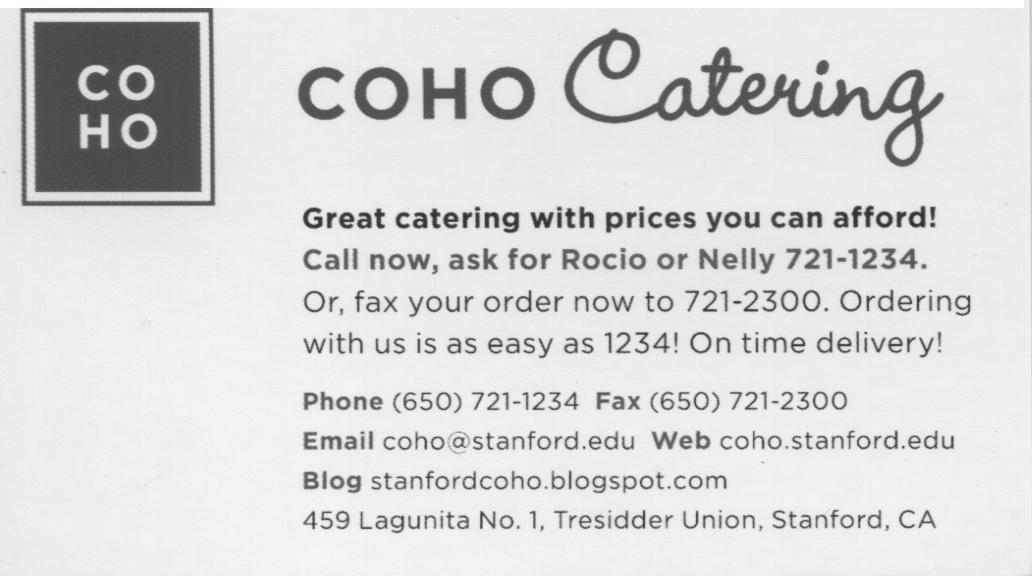

----------------------------------------
---------------Morphological gradient elipse kernel---------------


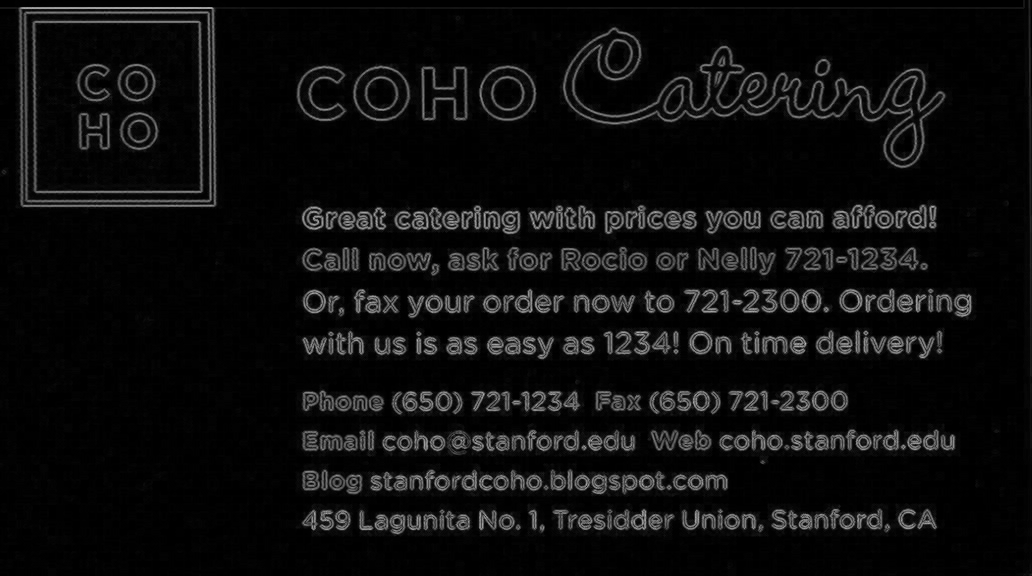

------------------------------------------------------------------
---------------Otsu Thresh + Morpho---------------


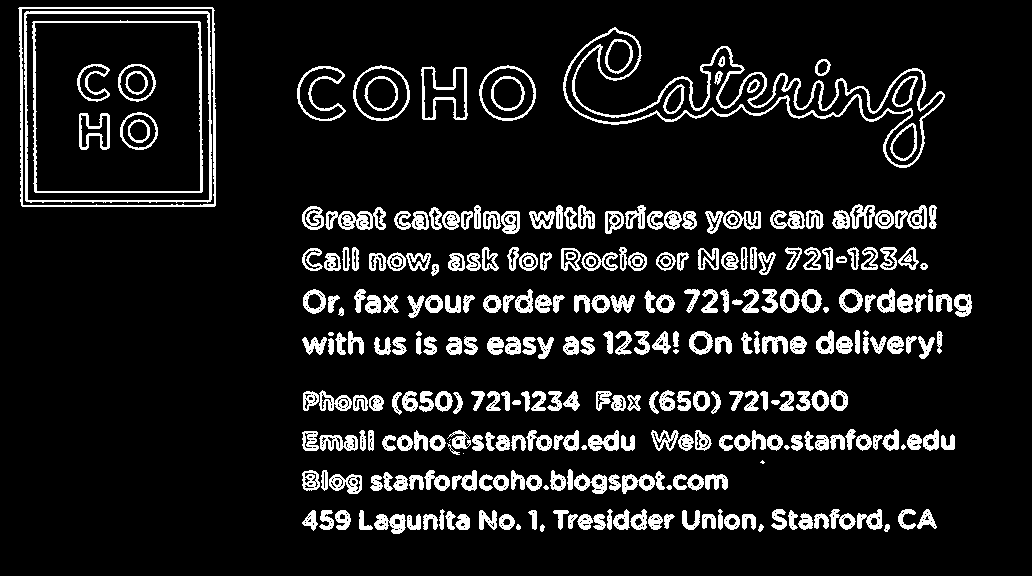

--------------------------------------------------
---------------Dilating---------------


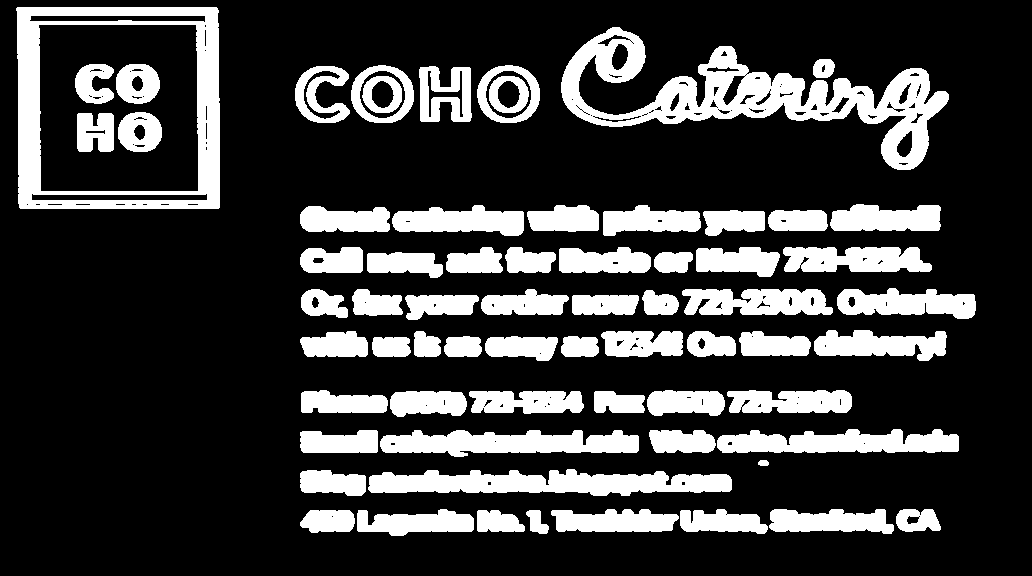

--------------------------------------


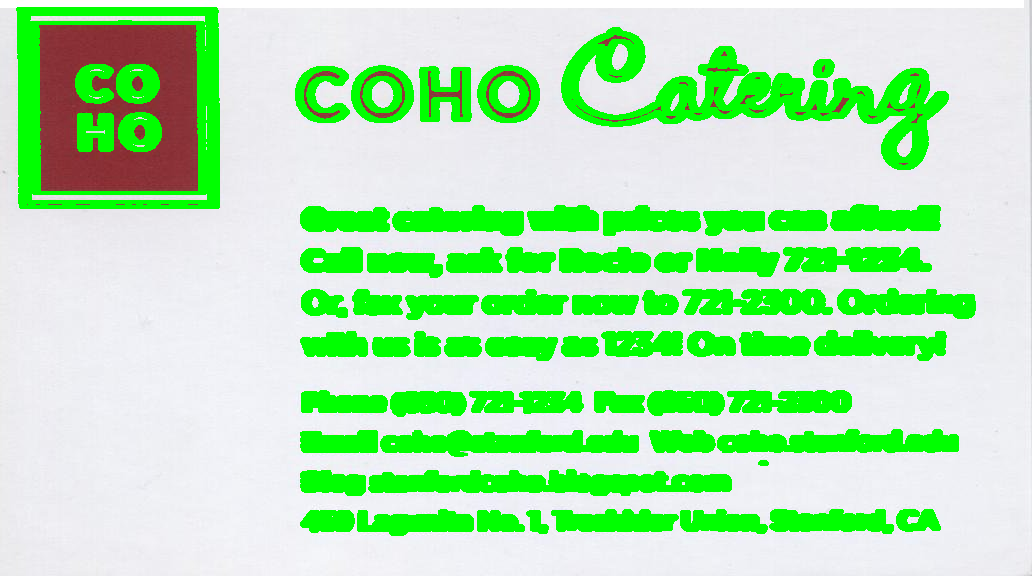

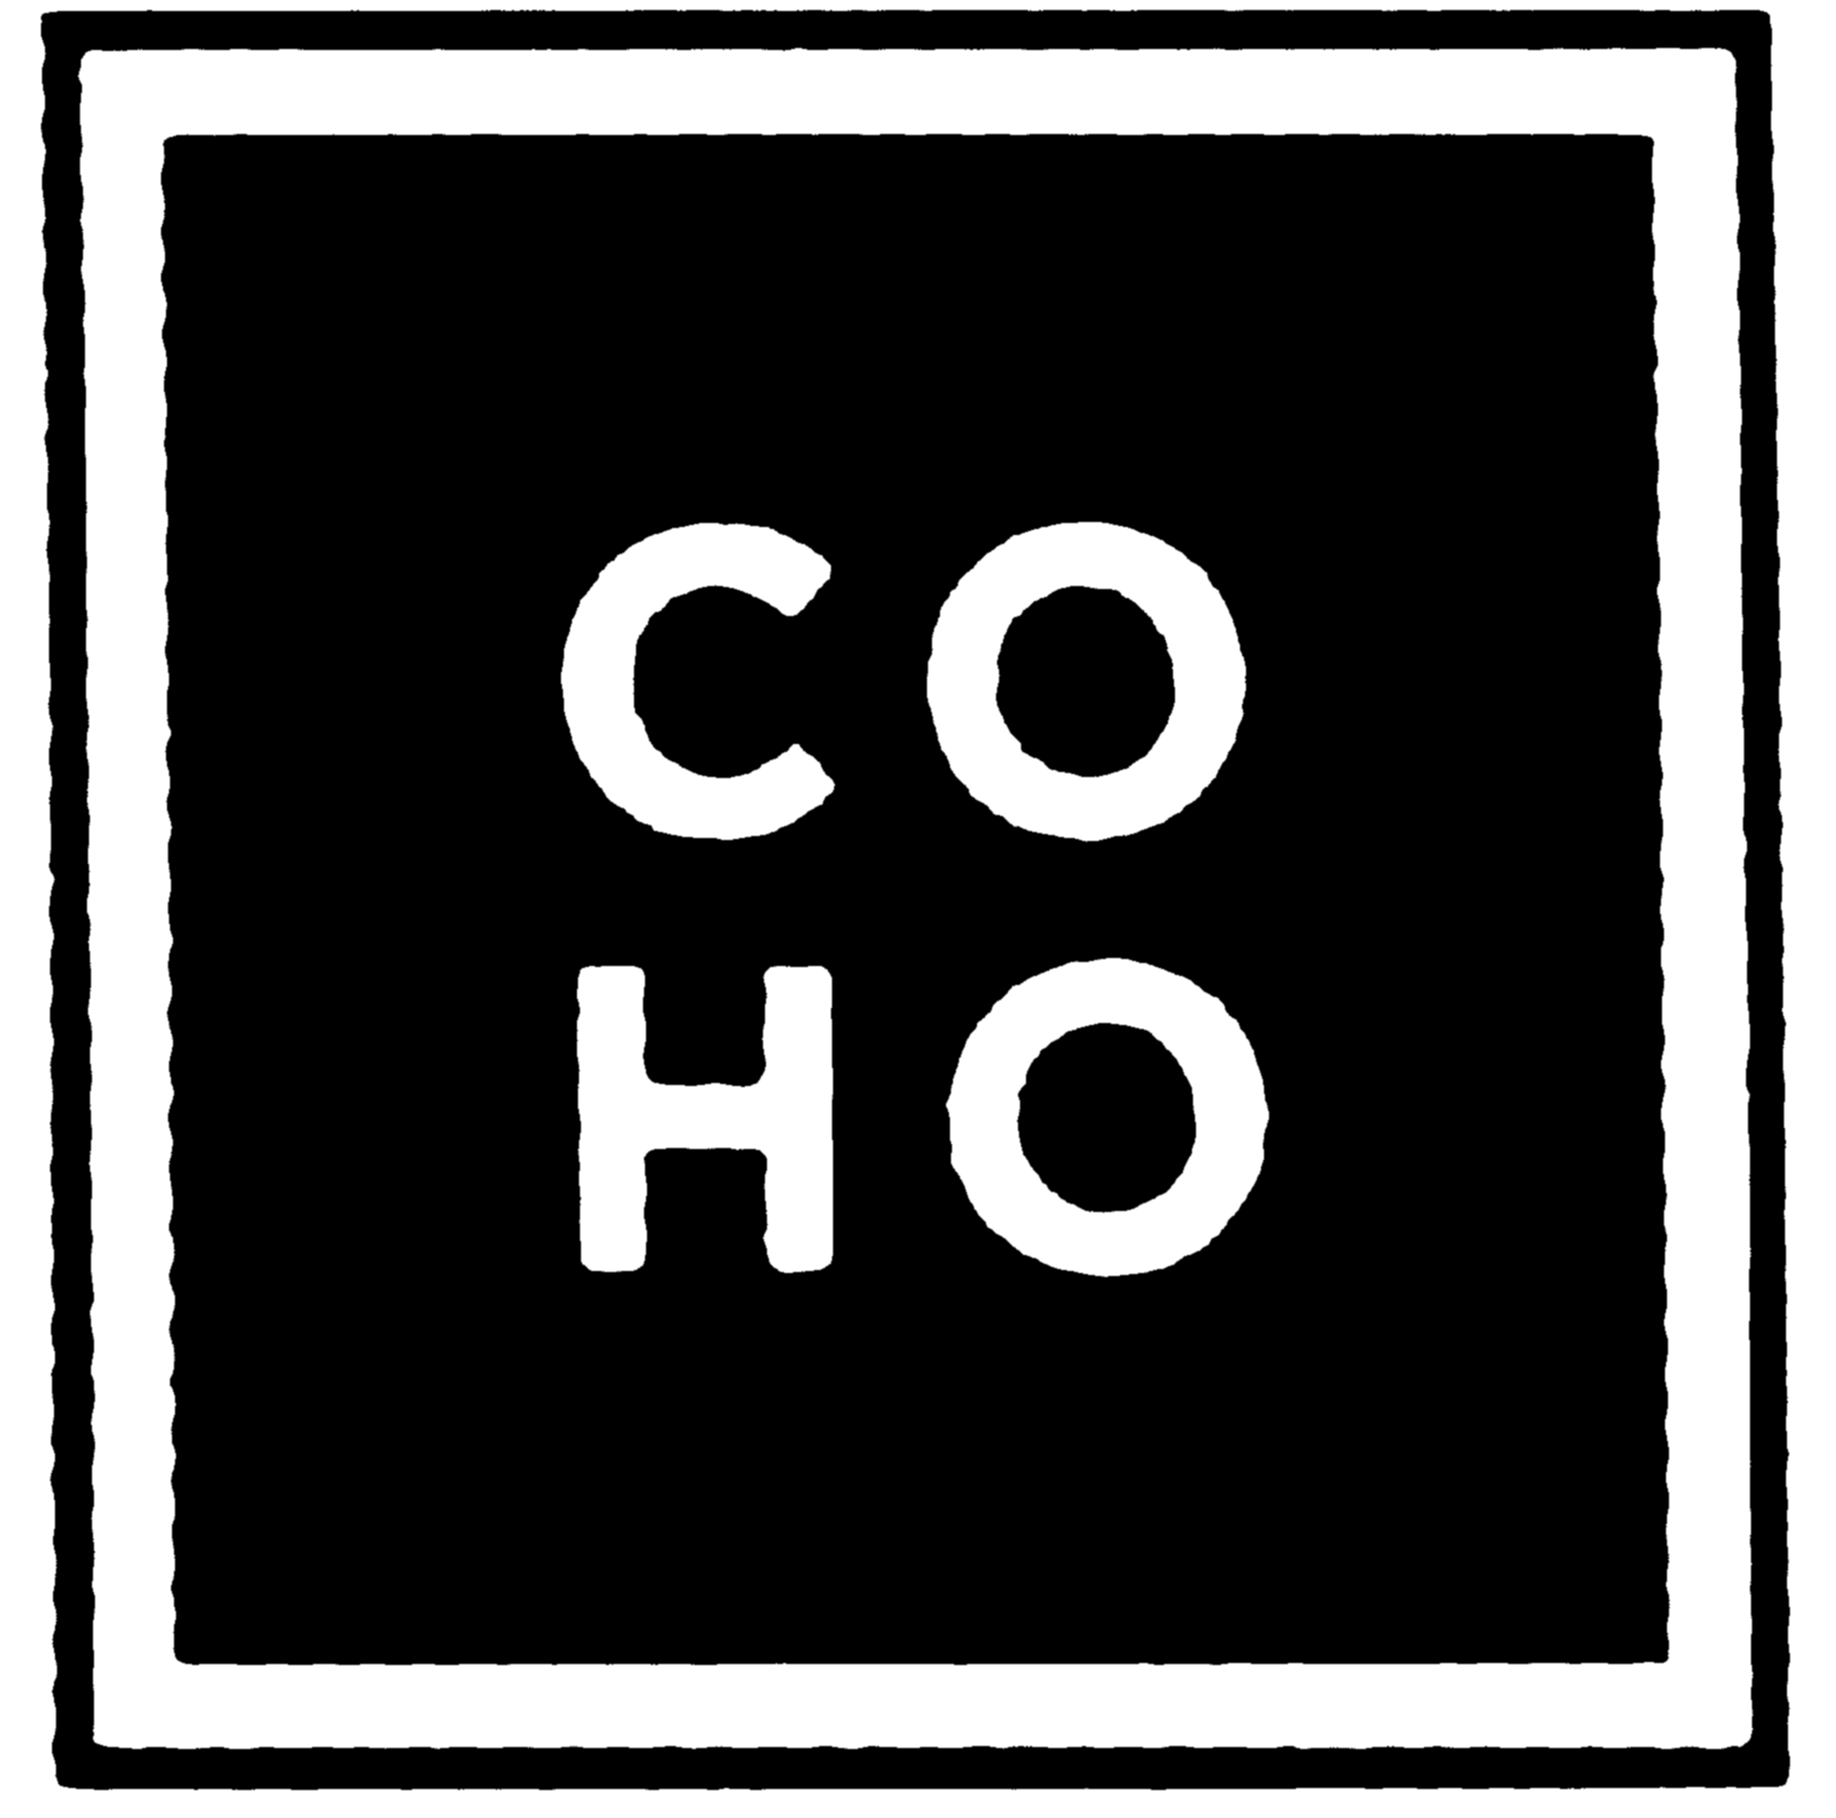

Thresh: CO
HO
enlarge at 9
------------------------------


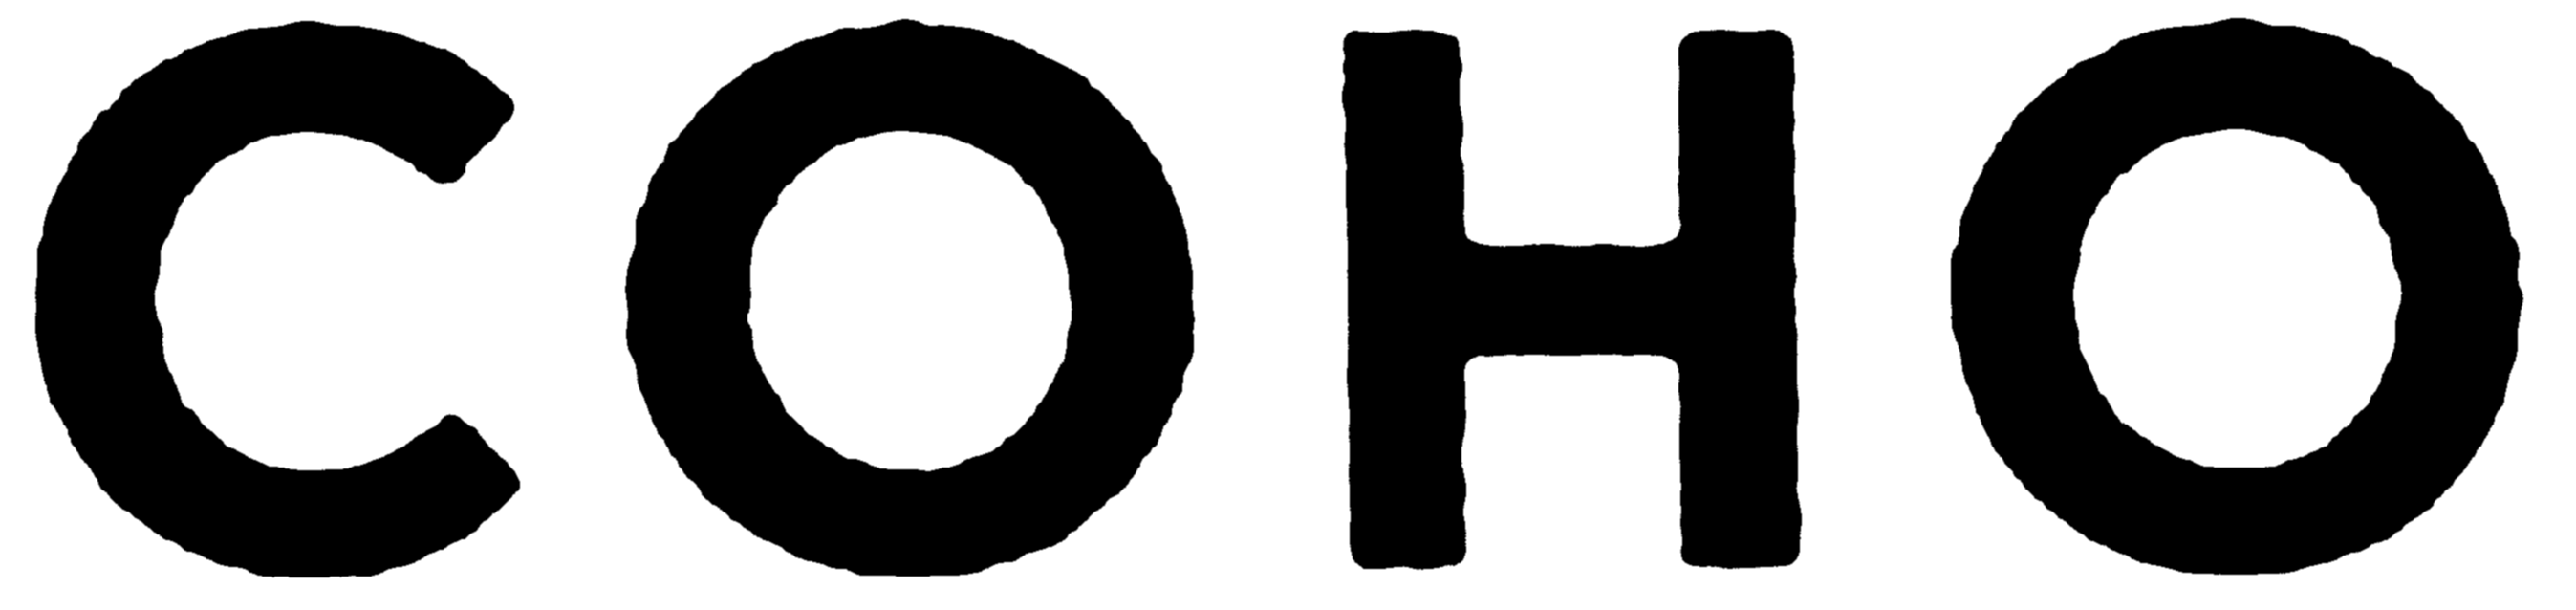

Thresh: COHO
enlarge at 11
------------------------------


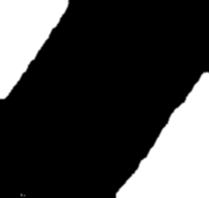

Thresh: r 4
enlarge at 11
------------------------------


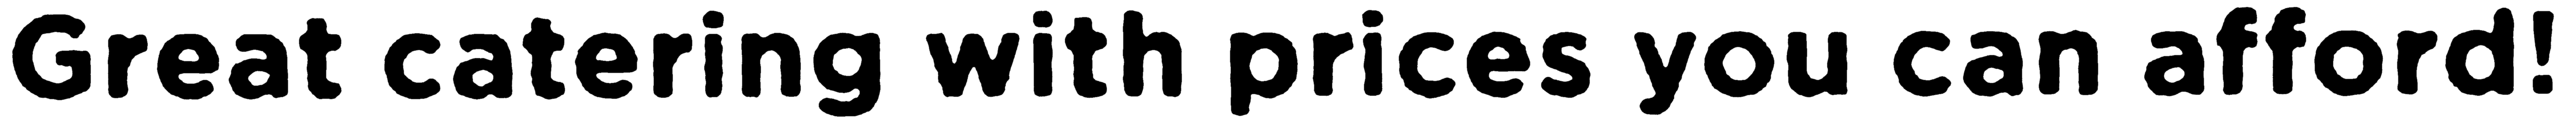

Thresh: Great catering with prices you can afford!
enlarge at 12
------------------------------


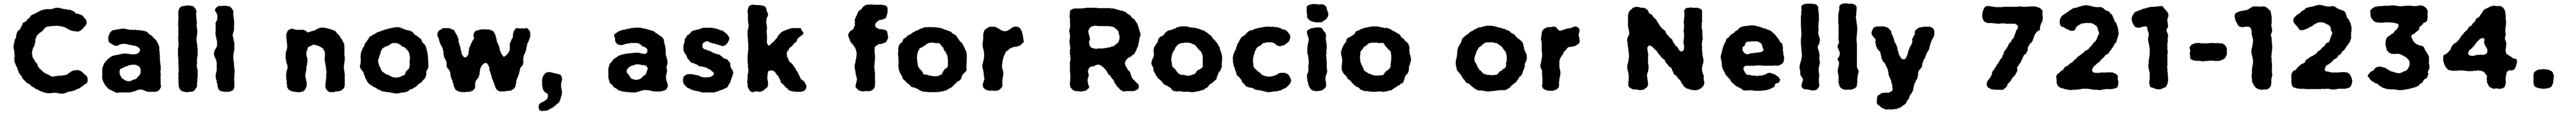

Thresh: Call now, ask for Rocio or Nelly 721-1234.
enlarge at 12
------------------------------


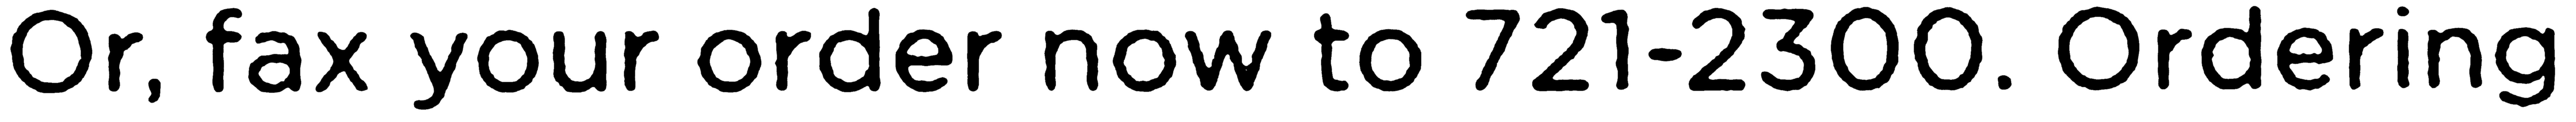

Thresh: Or, fax your order now to 721-2300. Ordering
enlarge at 12
------------------------------


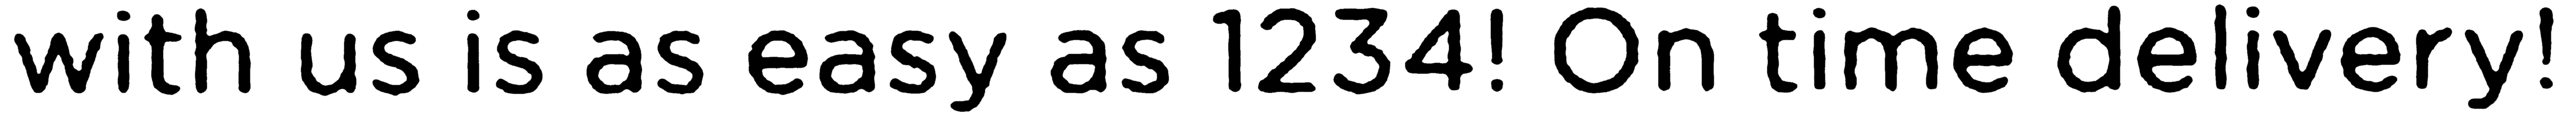

Thresh: with us IS as easy aS 1234! On time delivery!
enlarge at 12
------------------------------


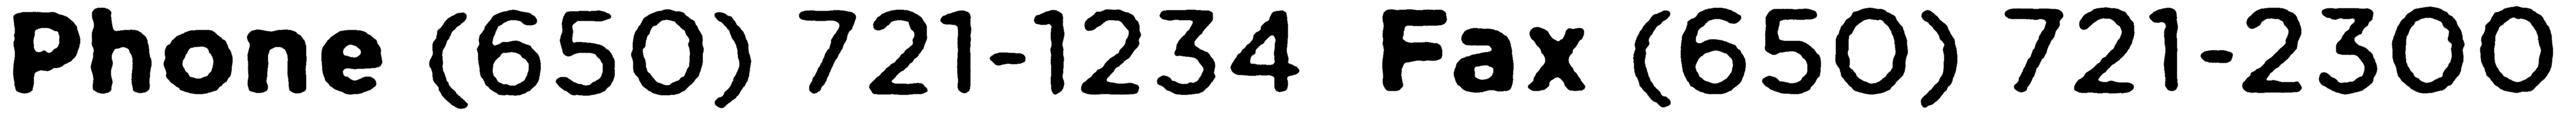

Thresh: Phone (650) 721-1234 Fax (650) 721-2400
enlarge at 12
------------------------------


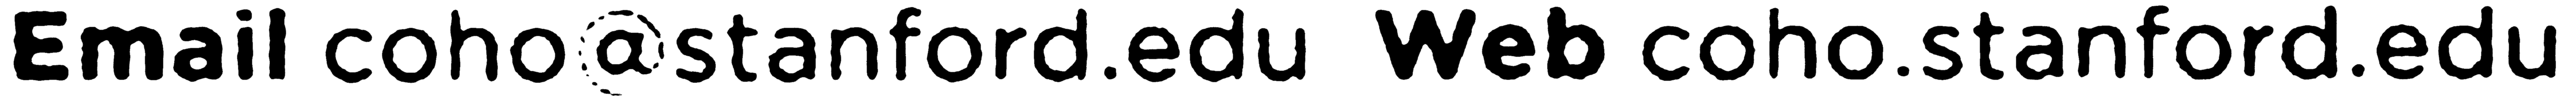

Thresh: Email coho‘astanford.edu Web coho.stanford.edu
enlarge at 12
------------------------------


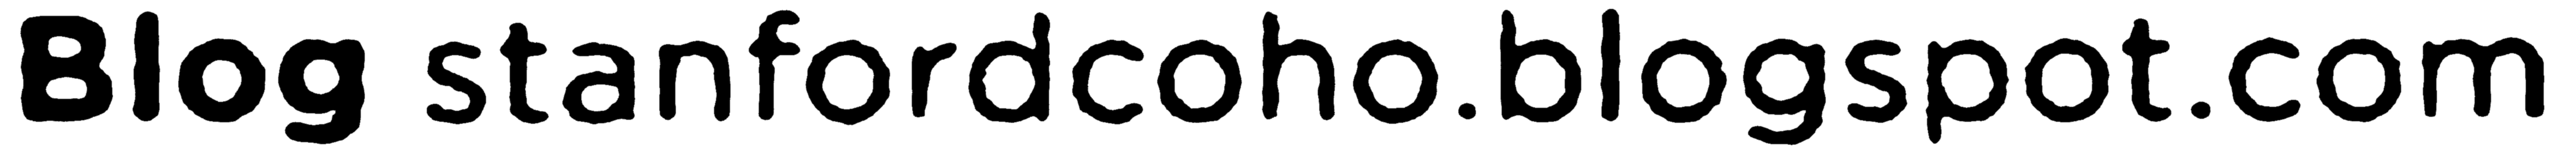

Thresh: Blog stanfordcoho.blogspot.com
enlarge at 12
------------------------------


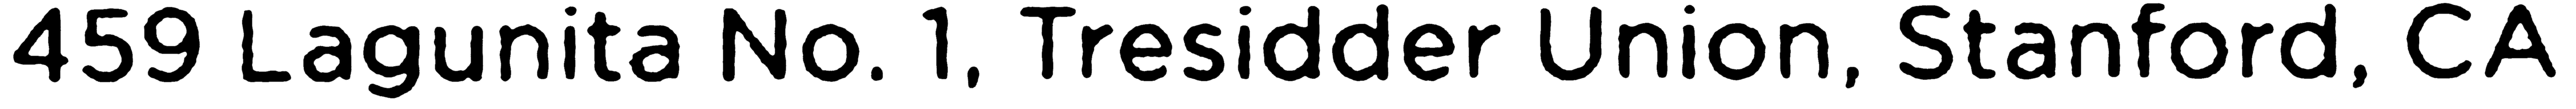

Thresh: 459 Lagunita No. 1, Tresidder Union, Stanford, CA
enlarge at 12
------------------------------


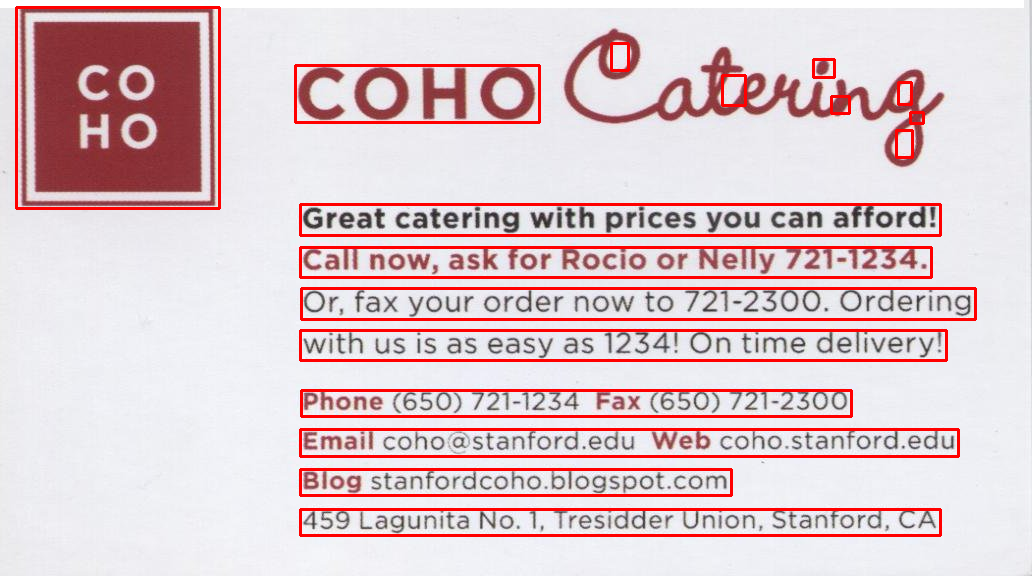

In [0]:
card_info = detect_text_2("/content/drive/My Drive/Python OpenCV/Accepted/Scanned/037.jpg", DEBUG = True)


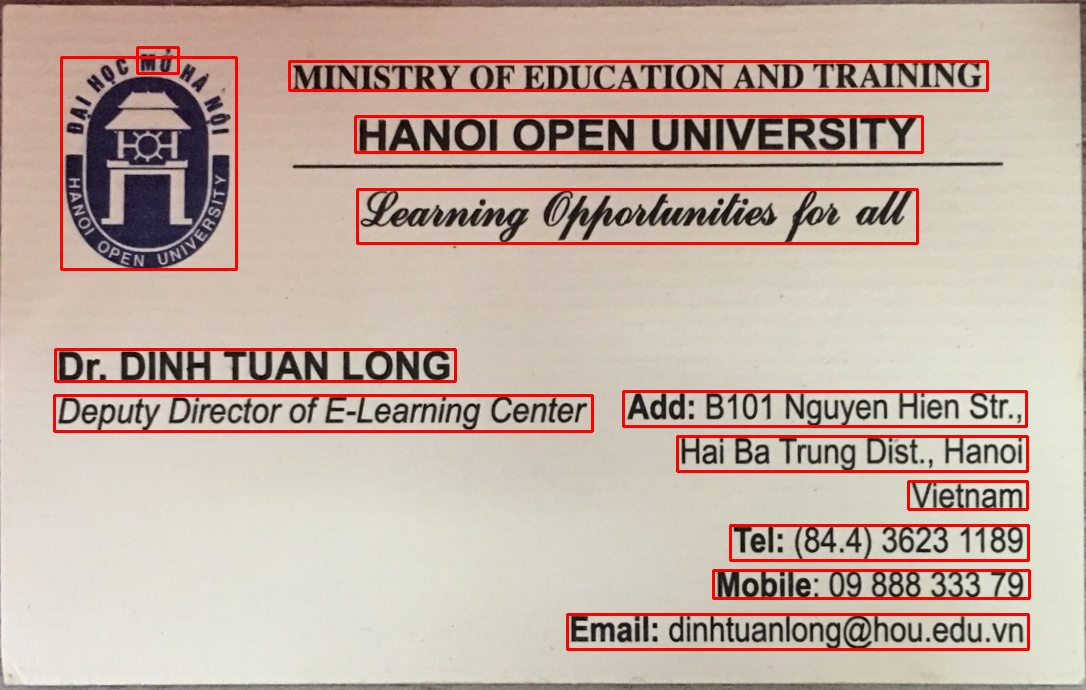

[('MINISTRY OF EDUCATION AND TRAINING', [289, 61, 699, 30]), ('HANO] OPEN UNIVERSITY', [355, 116, 568, 37]), ('Learning Opportunities for all', [357, 189, 561, 55]), ('Dr. DINH TUAN LONG', [55, 349, 401, 33]), ('Add: B101 Nguyen Hien Str.,', [623, 391, 404, 36]), ('Deputy Director of E-Learning Center', [54, 395, 539, 37]), ('Hai Ba Trung Dist., Hanot', [677, 436, 351, 36]), ('Vietnam', [908, 481, 120, 29]), ('Tel: (84.4) 3623 1189', [730, 525, 299, 36]), ('Mobile: 09 888 333 79', [713, 570, 317, 29]), ('Email: dinhtuanlong@hou.edu.vn', [567, 614, 462, 36])]


In [0]:

card_info = detect_text_2("/content/drive/My Drive/Python OpenCV/Accepted/RealTest/scan_7.jpg", DEBUG = False)
print(card_info)

In [0]:
test_dir = "/content/drive/My Drive/Python OpenCV/Accepted/Compar"
import os
# os.chdir(out_dir)
for indx, fname in enumerate(os.listdir(test_dir)):
  if "scan" in fname:
    image = cv2.imread(os.path.join(test_dir, fname))
    image = cv2.resize(image, None, fx=0.4, fy = 0.4, interpolation = cv2.INTER_AREA)
    new_name = "small" + str(indx) + ".jpg"
    cv2.imwrite(os.path.join(test_dir, new_name), image)
  

## Test Zone

In [0]:
image = cv2.imread("/content/drive/My Drive/Python OpenCV/Accepted/Scanned/040.jpg")
# May have to scale down (or up): good size is 1400 x 800 -> 700 x 400
height = image.shape[0]
width = image.shape[1]
scaled = image.copy()
gray = cv2.cvtColor(scaled, cv2.COLOR_BGR2GRAY)
kernel_elipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)) 
morpho = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel_elipse)

cv2_imshow_label(morpho, "Morphological gradient elipse kernel")

# Thresh hold
_, thresh_otsu_morpho = cv2.threshold(morpho, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow_label(thresh_otsu_morpho, "Otsu Thresh + Morpho")

thresh_copy = thresh_otsu_morpho.copy()
mask = np.zeros((height+2, width +2), np.uint8)
cv2.floodFill(thresh_copy, mask, (int(width*(8/9)), int(height*(1/9))), 255)
flood_fill_inv = cv2.bitwise_not(thresh_copy)
out = thresh_otsu_morpho | flood_fill_inv

  # Closing to remove noise
kernel_closing = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 2))
if cv2.countNonZero(out)/(height*width) < 0.3:
# kernel_closing_test = cv2.getStructuringElement(cv2.MORPH_RECT,(11,11))
  closing = cv2.morphologyEx(out, cv2.MORPH_CLOSE, kernel_closing)
  print(cv2.countNonZero(out)/(height*width))
  cv2_imshow_label(closing, "Using flood fill")
else:
  closing = cv2.morphologyEx(thresh_otsu_morpho, cv2.MORPH_CLOSE, kernel_closing)

horizontal = closing.copy()


cols = horizontal.shape[1]
horizontal_size = int(cols // 1.5)
# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
# Apply morphology operations
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)
# Show extracted horizontal lines
cv2_imshow_label(horizontal, "Extract horizontal")

In [0]:
for fname in 

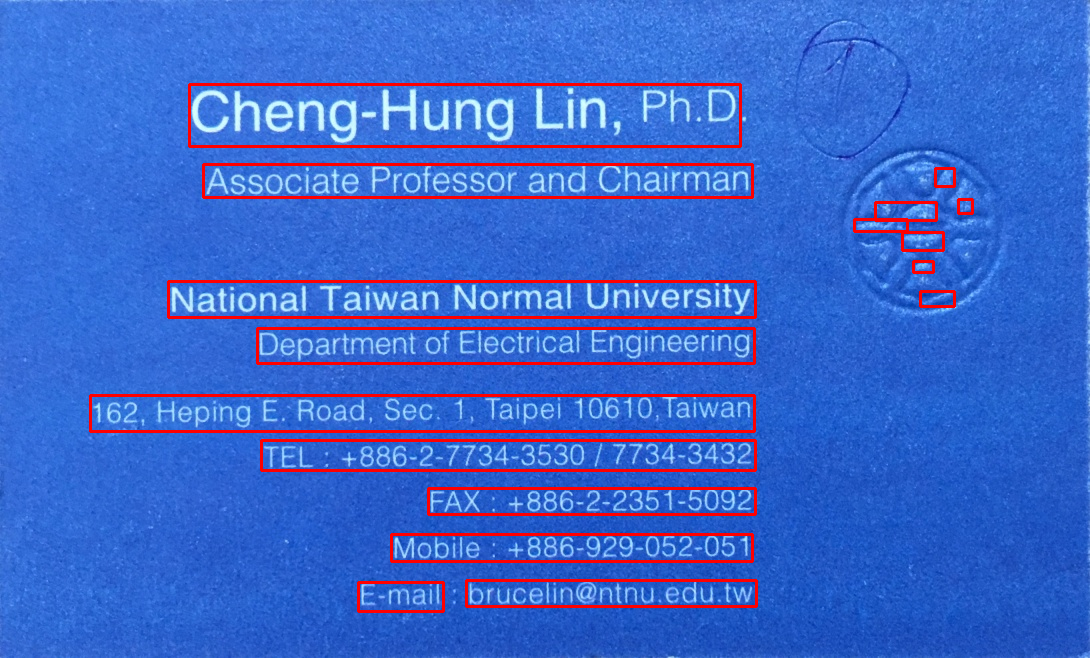

[('Cheng-Hung Lin, Ph.D', [189, 84, 552, 63]), ('Associate Professor and Chairman', [203, 164, 550, 34]), ('wre', [902, 232, 42, 19]), ('National Taiwan Normal University', [168, 281, 588, 37]), ('Department of Electrical Engineering', [257, 328, 498, 36]), ('162, Heping E. Road, Sec. 1, Taipei 10610, Taiwan', [90, 395, 665, 37]), ('TEL : +886-2-7734-3530 / 7734-3432', [261, 440, 495, 31]), ('FAX : +886-2-2351-5092', [428, 488, 328, 27]), ('Mobile : +886-929-052-051', [391, 534, 362, 28]), ('brucelin@ntnu.edu.tw', [466, 580, 291, 27]), ('E-mail', [358, 582, 86, 30])]


In [0]:
card_info = detect_text_2("/content/drive/My Drive/Python OpenCV/Accepted/Compar/small8.jpg")
print(card_info)
# print(detect_info_v2(card_info))

In [0]:
# card_info = [('Gul', [50, 43, 148, 74]), ('UNIVERSITY OF SCIENCE & TECHNOLOGY OF HANOI', [397, 79, 578, 24]), ('UNIVERSITE DES SCIENCES & DES TECHNOLOGIES DE HANOI', [296, 108, 680, 23]), ('www.usth.edu.vn', [38, 134, 186, 19]), ('REMY MULLOT (PROF.)', [46, 266, 366, 33]), ('Director of Department of Information and Communication Technology (ICT)', [46, 305, 880, 31]), ('Professor at la Rochelle University', [44, 334, 404, 28]), ('{A}', [37, 460, 46, 34]), ('Bldg. 2H, 18 Hoang Quoc Viet, Cau Giay, Hanoi', [101, 463, 607, 33]), ('(2)', [36, 500, 46, 29]), ('(+84-4) 37 91 69 60', [99, 503, 257, 29]), ('remy.mullot@univ-larochelle.fr', [35, 543, 461, 30])]
detect_info_v2(card_info, DEBUG = True)

[]
['tel  +886-2-7734-3530 / 7734-3432', 'fax  +886-2-2351-5092', 'mobile  +886-929-052-051']
text list final is: ['tel  +886-2-7734-3530 / 7734-3432', 'fax  +886-2-2351-5092', 'mobile  +886-929-052-051']
wegethere
num dict 1:  {'phone': 'tel  +886-2-7734-3530 / 7734-3432', 'fax': 'fax  +886-2-2351-5092', 'cell': 'mobile  +886-929-052-051'}
num dict 2:  {'phone': 'tel  +886-2-7734-3530 / 7734-3432', 'fax': 'fax  +886-2-2351-5092', 'cell': 'mobile  +886-929-052-051'}
Finder Acora found job title is: 
FOUND HUMAN BASED ON TITLE
Use CoreNLP to detect job title **************
Guess title:  Associate Professor and Chairman
wre
Guess title:  National Taiwan Normal University
Department of Electrical Engineering
E-mail
Guess title:  E-mail
Cheng-Hung Lin, Ph.D Associate Professor and Chairman wre National Taiwan Normal University Department of Electrical Engineering 162, Heping E. Road, Sec. 1, Taipei 10610, Taiwan TEL : +886-2-7734-3530 / 7734-3432 FAX : +886-2-2351-5092 Mobile : +886-929-05

{'company': 'Associate Professor and Chairman National Taiwan Normal University Department of Electrical Engineering E-mail ',
 'contact_number': {'cell': 'mobile  +886-929-052-051',
  'fax': 'fax  +886-2-2351-5092',
  'phone': 'tel  +886-2-7734-3530 / 7734-3432'},
 'email': ['brucelin@ntnu.edu.tw'],
 'human': ['Cheng-Hung Lin, Ph.D'],
 'job_title': ['', 'Chairman'],
 'street_address': '162, Heping E. Road, Sec. 1, Taipei 10610, Taiwan',
 'website': []}

In [0]:
element = "Prof. Wen-Chung Kao, Ph.D."
ner_tagger = CoreNLPParser(url='http://localhost:9011', tagtype='ner')
ne = list(ner_tagger.tag((element.split())))
title_set = ["mr.", "dr.", "mrs.", "ph.d", "prof."]
  
# print(title_set & set([member.lower() for member, _ in ne]))
for title in title_set:
  if any(title in member.lower() for member, _ in ne):
    print("Yes")

Yes
Yes


In [0]:
" " in element and all(letter[0].isupper() for letter in [element.split()])

False

In [0]:
print("Toshiaki Aoki, Ph.D".upper())

TOSHIAKI AOKI, PH.D


In [0]:
ner_tagger = CoreNLPParser(url='http://localhost:9011', tagtype='ner')
element = "Dr. DINH TUAN LONG"
elementTitle = element.title()
ne = list(ner_tagger.tag((elementTitle.split())))
neUpper = list(ner_tagger.tag((element.upper().split())))
print(ne)
print(neUpper)

[('Dr.', 'O'), ('Dinh', 'PERSON'), ('Tuan', 'PERSON'), ('Long', 'PERSON')]
[('DR.', 'O'), ('DINH', 'O'), ('TUAN', 'O'), ('LONG', 'O')]


In [0]:
finder.findall("Gul UNIVERSITY OF SCIENCE & TECHNOLOGY OF HANOI UNIVERSITE DES SCIENCES & DES TECHNOLOGIES DE HANOI www.usth.edu.vn REMY MULLOT (PROF.) Director of Department of Information and Communication Technology (ICT) Professor at la Rochelle University {A} Bldg. 2H, 18 Hoang Quoc Viet, Cau Giay, Hanoi (2) (+84-4) 37 91 69 60 remy.mullot@univ-larochelle.fr")

[Match(start=136, end=144, match='Director')]

## Detect info function

In [0]:
def detect_info_v2(card_info, DEBUG = False):
  card_info_dup = ' '.join([info for info, _ in card_info])
  
  elements = [info for info, _ in card_info if info != '']

    
  tags = ["BS" for i in range(len(elements))]
  global finder
  global WORD_SET
  emails = []
  websites = []
  for element in elements:
    if "@" in element:
      inserted_email = get_email(element)
      if len(inserted_email) != 0:
        emails += inserted_email
    if "." in element:
      candidate_web = get_website(element)
      for candidate in candidate_web:
        for mail in emails:
          if candidate not in mail:
            websites.append(candidate)
    
#   print(emails)
  print(websites)
  
  #Named entity recog tagger
  ner_tagger = CoreNLPParser(url='http://localhost:9011', tagtype='ner')
#   #Find job title
#   job_title = ""
#   if get_upper_case_ratio(card_info_dup.replace(" ", "")) >=0.6:
#     job_title_match = list(finder.finditer(card_info_dup.title(), use_longest = True))
#     if len(job_title_match) > 0:
#       job_title = job_title_match[0].match
     
#   else:
#     job_title_match = list(finder.finditer(card_info_dup, use_longest = True))
#     if len(job_title_match) > 0:
#       job_title = job_title_match[0].match
#     else:
#       job_title_match = list(finder.finditer(card_info_dup.title(), use_longest = True))
#       if len(job_title_match) > 0:
#         job_title = job_title_match[0].match
#   if DEBUG:
#   print("job title is: " + job_title)
  
  # Use PoolThread for tagging address and contact num:
  pool = ThreadPool(8)
  street_add_bool = pool.map(is_street_add, elements)
#   print("Street add bool:" + str(street_add_bool))
  street_add = " ".join([element for indx, element in enumerate(elements) if street_add_bool[indx] == True])

  contact_num_bool = pool.map(is_contact_number, elements)
  contact_numbers = [element for indx, element in enumerate(elements) if contact_num_bool[indx] == True]
#   print("###########DEBUG###################")
#   print(contact_numbers)
#   print("###########DEBUG###################")
  number_container_dict = get_contact_num(contact_numbers)
  
  #Find job title
  job_title = [""]
#   min_ratio = 2.5
  for indx, element in enumerate(elements):
    if get_upper_case_ratio(element.replace(" ", "")) > 0.5:
      element = element.title()
    if street_add_bool[indx] == False and contact_num_bool[indx] == False:
      job_title_match = finder.findall(element)
      if len(job_title_match) > 0:      
        for match_result in job_title_match:
          job_candidate = match_result.match
          if job_candidate in element.split():
            job_title.append(job_candidate)
        
#         element_job_ratio = len(element)/len(job_title_match[0].match)
#         if element_job_ratio < min_ratio:
#           min_ratio = element_job_ratio
#           job_title[0] = job_title_match[0].match
  if DEBUG:
    print("Finder Acora found job title is: " + job_title[0])
  
  #Tagging

  
  # 1st loop to tag JOB, EMAIL AND WEBSITE:
  for indx, element in enumerate(elements):
    if any(email in element.lower() for email in emails) and emails != []:
      tags[indx] = 'EMAIL'
      continue
    elif any(website in element.lower() for website in websites) and websites != []:
      tags[indx] = 'WEBSITE'
    elif not set(job_title[0].lower().split()).isdisjoint(element.lower().split()) and job_title[0] != "":
      tags[indx] = 'JOB'
    elif street_add_bool[indx] == True:
      tags[indx] = "ADDRESS"
    elif contact_num_bool[indx] == True:
      tags[indx] = "CONNUM"
    

  #####################################################################################
  # Now we detect human name and company name

  human = []
  
  found_person = False
  company_name = ""
  found_company = False
  title_set = ["mr.", "dr.", "mrs.", "ph.d", "prof."]
  
#   if len(websites) > 0:
#     website_sm = SequenceMatcher(lambda x: x==' ', '', websites[0].lower(), autojunk = False)
#   if len(emails) > 0:
#     email_sm = SequenceMatcher(lambda x: x==' ', '', emails[0].lower(), autojunk = False)

  for indx, element in enumerate(elements): 
    if tags[indx] == 'BS' or tags[indx] == "JOB":
      ele_len = len(element)
      ele_ratio = get_num_ratio(element)
      
      elementTitle = element.title()
     
      # Detect human name
#       and all(letter[0].isupper() for letter in [element.split()])
      if found_person == False and " " in elementTitle:
       
        ne = list(ner_tagger.tag((elementTitle.split())))
        for title in title_set:
          if any(title in member.lower() for member, _ in ne):
            found_person = True
            tags[indx] = "PERSON"
            human.append(element)
            print("FOUND HUMAN BASED ON TITLE")
            break
#         neUpper = list(ner_tagger.tag((element.upper().split())))
        if found_person == True:
          continue
        # Count number of "PERSON" tag, if it is 1 then there is something wrong
        # Also if there is ORGANIZATION tag then it may likely be COmpany name
        num_of_PERSON = 0
        ###### Test Zone  #####################
        current_container = ""
        for indx_ne, word_tag in enumerate(ne):
          word = word_tag[0]
          tag = word_tag[1]
          if tag == "ORGANIZATION":
            human = []
            found_person = False
            current_container = ""
            tags[indx] = "BS"
            break
          if (tag != "PERSON" and current_container != ""):
            if len(current_container)/(ele_len) > 0.4 and num_of_PERSON >= 2:
              human.append(current_container.strip(" "))
              found_person = True
              tags[indx] = "HUMAN"
            current_container = ""
          elif (tag == "PERSON"):
            ## If the same word in element.upper() is also a PERSON then the 
            ## current name is guranteed to be a person name
#             print("Person taag: " + word)
            num_of_PERSON += 1
            current_container += word
            current_container += " "
            if indx_ne == len(ne) -1:
              if num_of_PERSON >= 2:
                human.append(current_container.strip(" "))
                found_person = True
                tags[indx] = "HUMAN"
        
        if found_person == True:
          continue
            
        #######################################
     
      # Detect company name fist round
      if found_company == False:
        element_replaced = element.replace(" ", "").replace("\n", "")
        if len(websites) > 0:
          similarity = fuzz.ratio(element_replaced, websites[0])
#           website_sm.set_seq1(element.replace(' ', '').replace('\n', "").lower())
#           website_match = website_sm.find_longest_match(0, len(element.replace(' ', '').replace('\n', "").lower()), 0, len(websites[0]))
#           element_match_ratio = website_match.size / len(element.replace(' ', ''))
# (website_match.size >= 3 and element_match_ratio >= 0.27) or website_match.size >= 7
          if similarity >= 45:
  #           print("###########DEBUG###################")
  #           print(element)
  #           print("###########DEBUG###################")
            company_name += element
            company_name += ' '
            tags[indx] = 'COMPANY'
            found_company = True
            continue
        if len(emails) > 0: 
          similarity = fuzz.ratio(element_replaced, emails[0])
#           email_sm.set_seq1(element.replace(' ', '').replace('\n', "").lower())                                           
#           email_match = email_sm.find_longest_match(0, len(element.replace(' ', '').replace('\n', "").lower()), 0, len(emails[0]))
#           element_match_ratio = email_match.size / len(element.replace(' ', ''))
# email_match.size >= 3 and element_match_ratio >= 0.27
          if similarity >= 45:
            company_name += element
            company_name += ' '
            tags[indx] = 'COMPANY'
            found_company = True
  #           print(element + " time")
            continue
        # Maybe organization
        ne = list(ner_tagger.tag((element.title().split())))
        num_of_ORGA = 0
        for word, tag in ne:
#           print(tag)
          if tag == "ORGANIZATION":
            num_of_ORGA += 1
        if num_of_ORGA / len(ne) > 0.25:
          if DEBUG:
            print("ORGANIZATION tag detected")
          tags[indx] = "COMPANY"
          company_name += element + " "
          found_company = True
          continue
              
        # May be abbreviation 
        if len(websites) > 0: 
          comp_name_abbreviated = ''.join([charac[0] for charac in element.split() if charac[0].isupper()])
          score = fuzz.ratio(comp_name_abbreviated.lower(), websites[0])
          if score >= 80:
            company_name += element
            company_name += ' '
            tags[indx] = 'COMPANY'
            found_company = True
            print("abbreviation match " + element)
            continue
        

      
      

#         for word, tag in ne:
#           if tag == "ORGANIZATION":
#             human = []
#             contain_person = False
#             current_tag = ""
#             break
#           if tag != 'PERSON' and current_tag != "":
#             if len(current_tag)/(ele_len) > 0.4:
#               human.append(current_tag.strip(" "))
#               contain_person = True
#             current_tag = ""
#           elif tag == 'PERSON':
#             num_of_PERSON += 1
#             current_tag += word
#             current_tag += ' '
#         if num_of_PERSON == 1:
#           human = []
#           contain_person = False
#           current_tag = ""
#         if contain_person == True or (tag == 'PERSON' and len(current_tag)/(ele_len) > 0.4):
#           human.append(current_tag.strip(" "))
#           tags[indx] = "HUMAN"
#           current_tag = ""
#           contain_person = True
#           continue
          
          
  
  
        
  if job_title[0] == "":
    # Use CoreNLP
    print("Use CoreNLP to detect job title **************")
    for indx, element in enumerate(elements):
      if tags[indx] == "BS" and len(element) >= 3:
        num_of_TITLE = 0
        ne = list(ner_tagger.tag(element.split()))
        for tag, chunk in groupby(ne, lambda x:x[1]):
          if tag == "TITLE":
            num_of_TITLE += 1
            break
        if num_of_TITLE / len(ne) > 0.25:
            job_title.append(element)
            tags[indx] = "JOB"
            print("Detect job round 2")

    if job_title[0] == "":
      for indx, element in enumerate(elements):
        if tags[indx] == "HUMAN" and "dr." in element.lower():
          job_title[0] = "Doctor"
          break
        if tags[indx] == "BS" and len(element) >= 3:
          _, num_NN = proper_noun_ratio(element)
          if num_NN >= 0.5 and element in WORD_SET:
            job_title[0] += element 
            tags[indx] = "JOB"
            print("Detect job round 3")
            break
  
  if company_name == "":
    for indx, element in enumerate(elements):
      if tags[indx] == "BS":
        if guess_title(element, card_info[indx][1]):
          print("Guess title: ", element)
          company_name += element
          company_name += ' '
          tags[indx] = "COMPANY"
#           break
          
  if company_name == "":
    for indx, element in enumerate(elements):
      if tags[indx] == "BS":
        if guess_title(element, card_info[indx][1], first_time = False):
          company_name += element
          tags[indx] = "COMPANY"
          break
        
  #Round two detecting
  #We want to include element with BS tag to ADDRESS or COMPANY depending
  #on whether it is "close" to the element having the above tags
  #ADDRESS and COMPANY and COmpany name and Job title
  for i in range(2):
    for indx, element in enumerate(elements):
      if tags[indx] == 'BS':
        BS_rect = card_info[indx][1]
        for subIndx, subElement in enumerate(elements):
          if tags[subIndx] == 'COMPANY' or tags[subIndx] == 'ADDRESS':
            sub_rect = card_info[subIndx][1]
            if can_be_merged(BS_rect, sub_rect) == True:
              tags[indx] = tags[subIndx]
              # Modify the variable: we need to decide if we would append 
              # before or after or even in middle. 
              # We replace the string of the subElement with 
              # element + subElement or subElement + element depends on whether
              # BS_rect is above or below sub_rect
              if BS_rect[1] > sub_rect[1]:
                # below
                if tags[indx] == 'COMPANY':
                  company_name = company_name.replace(subElement, subElement + ' ' + element)
                elif tags[indx] == 'ADDRESS':
                  street_add = street_add.replace(subElement, subElement + ' ' + element)
              elif BS_rect[1] < sub_rect[1]:
                #above
                # below
                if tags[indx] == 'COMPANY':
                  company_name = company_name.replace(subElement, element + ' ' + subElement)
                elif tags[indx] == 'ADDRESS':
                  street_add = street_add.replace(subElement, element + ' ' + subElement)
              break
  
      
        

  #
  if DEBUG:
    print(card_info_dup)
    print(elements)
    print(tags)
    
  info_dictionary = {"email" : [], "website": [], "job_title" : "", "street_address": "", "contact_number": {}, "human" : [], "company" : ""}
  info_dictionary["email"] = emails
  info_dictionary["website"] = websites
  info_dictionary["job_title"] = job_title
  info_dictionary["street_address"] = street_add
  info_dictionary["contact_number"] = number_container_dict
  info_dictionary["human"] = human
  info_dictionary["company"] = company_name
  return info_dictionary